# ***Model Building and Analysis***

This section is part of the main model, beginning with statistical analysis and machine learning models. I will explain each model and the variables used in developing the exercise. According to what we were spoke before you ask me that please modify and look for information, so to advance and have a clear orientation, my problem and thesis statement are: 

- <small> Thesis Statement: This research aims to develop machine learning models to accurately predict fuel price fluctuations (diesel, E5, E10) using data from German gas stations. By integrating data on energy generation, consumption, and electricity prices from neighboring countries, the study will analyze impacts on German industries. Advanced data science techniques and explainable AI methods will enhance prediction transparency, identify key influencing factors, and provide actionable insights for stakeholders.
- Problem Statement: Fuel prices at gas stations fluctuate frequently, impacting German industries. The lack of transparency and complexity in factors driving these changes necessitate accurate predictive models and clear insights. This research addresses this by developing machine learning models to predict fuel prices and analyze their impacts using comprehensive energy data, aiming to enhance transparency, prediction accuracy, and provide data-driven recommendations.


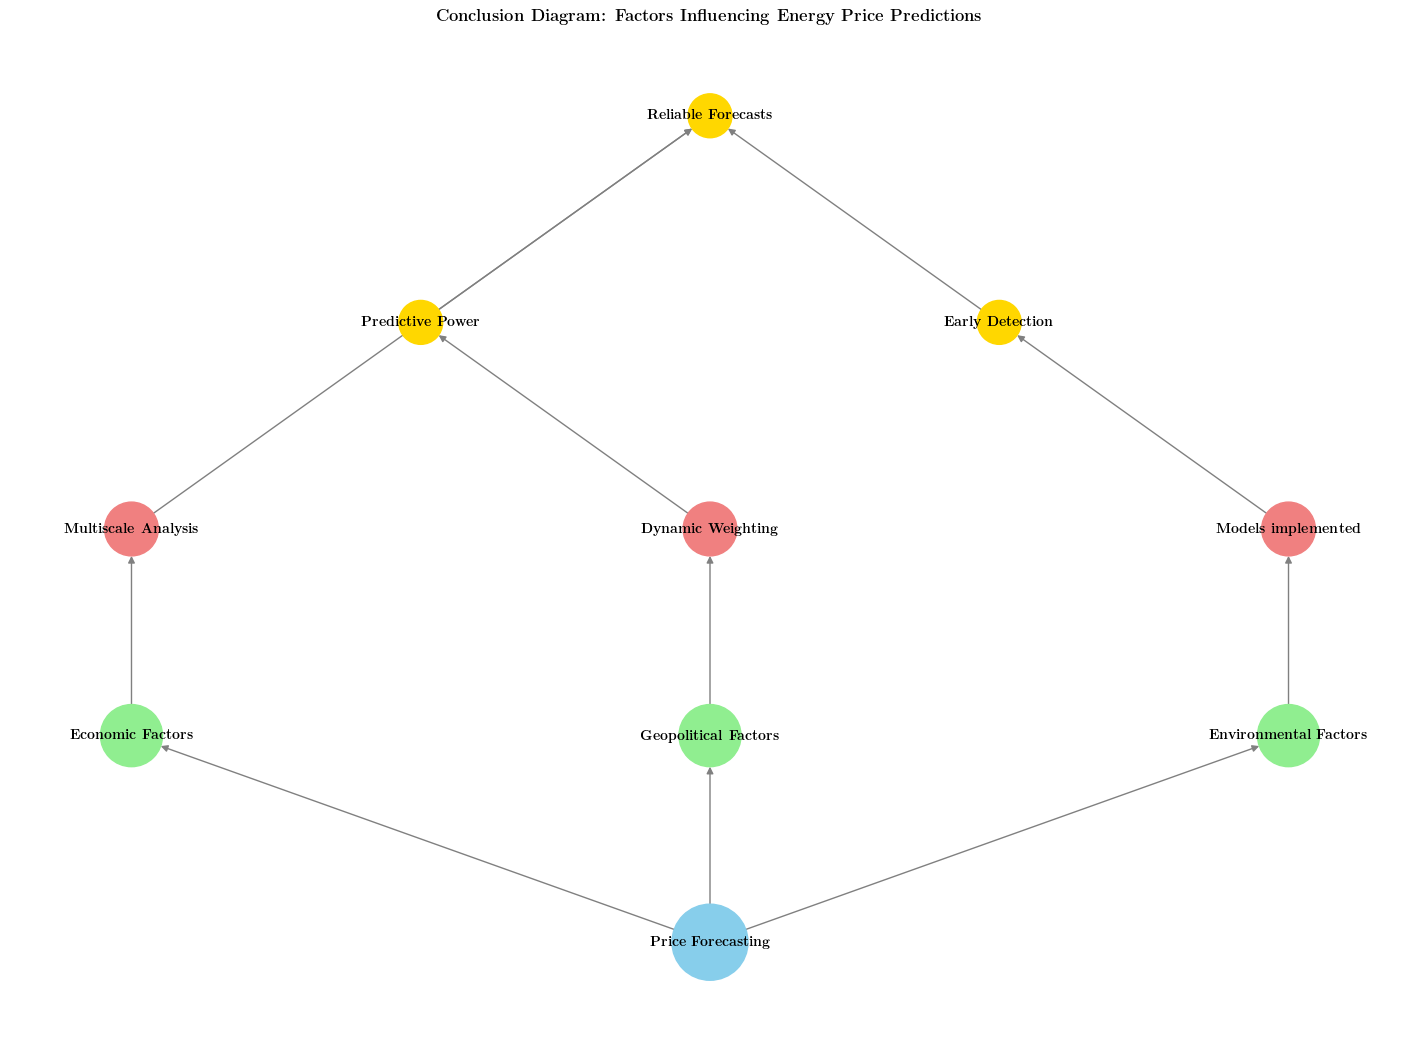

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Set up for using LaTeX in matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Create a directed graph
G = nx.DiGraph()

# Add nodes with their attributes
G.add_node(r"$\textbf{Price Forecasting}$", pos=(0, 0), size=3000, color='skyblue')
G.add_node(r"$\textbf{Economic Factors}$", pos=(-3, 1.5), size=2000, color='lightgreen')
G.add_node(r"$\textbf{Geopolitical Factors}$", pos=(0, 1.5), size=2000, color='lightgreen')
G.add_node(r"$\textbf{Environmental Factors}$", pos=(3, 1.5), size=2000, color='lightgreen')
G.add_node(r"$\textbf{Multiscale Analysis}$", pos=(-3, 3), size=1500, color='lightcoral')
G.add_node(r"$\textbf{Dynamic Weighting}$", pos=(0, 3), size=1500, color='lightcoral')
G.add_node(r"$\textbf{Models implemented}$", pos=(3, 3), size=1500, color='lightcoral')
G.add_node(r"$\textbf{Predictive Power}$", pos=(-1.5, 4.5), size=1000, color='gold')
G.add_node(r"$\textbf{Early Detection}$", pos=(1.5, 4.5), size=1000, color='gold')
G.add_node(r"$\textbf{Reliable Forecasts}$", pos=(0, 6), size=1000, color='gold')

# Add edges
edges = [
    (r"$\textbf{Price Forecasting}$", r"$\textbf{Economic Factors}$"),
    (r"$\textbf{Price Forecasting}$", r"$\textbf{Geopolitical Factors}$"),
    (r"$\textbf{Price Forecasting}$", r"$\textbf{Environmental Factors}$"),
    (r"$\textbf{Economic Factors}$", r"$\textbf{Multiscale Analysis}$"),
    (r"$\textbf{Geopolitical Factors}$", r"$\textbf{Dynamic Weighting}$"),
    (r"$\textbf{Environmental Factors}$", r"$\textbf{Models implemented}$"),
    (r"$\textbf{Multiscale Analysis}$", r"$\textbf{Reliable Forecasts}$"),
    (r"$\textbf{Dynamic Weighting}$", r"$\textbf{Predictive Power}$"),
    (r"$\textbf{Models implemented}$", r"$\textbf{Early Detection}$"),
    (r"$\textbf{Predictive Power}$", r"$\textbf{Reliable Forecasts}$"),
    (r"$\textbf{Early Detection}$", r"$\textbf{Reliable Forecasts}$")
]

G.add_edges_from(edges)

# Get positions, sizes, and colors
pos = nx.get_node_attributes(G, 'pos')
sizes = [nx.get_node_attributes(G, 'size')[n] for n in G.nodes]
colors = [nx.get_node_attributes(G, 'color')[n] for n in G.nodes]

# Draw the graph
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, node_size=sizes, node_color=colors, font_size=10, font_weight='bold', edge_color='gray', arrows=True)
plt.title(r'\textbf{Conclusion Diagram: Factors Influencing Energy Price Predictions}')

# Save the figure to a file
plt.savefig(r'~Local\energy_price_predictions_graph.png')


plt.show()


# **Exploratory Data Analysis (EDA)**

### **_First steps of statistical approach_**

One of the main ideas explored in this document, and discussed in the literature review from the previous chapter, is that energy pricing is influenced by multiple factors. Regardless of the specific element, the pricing mechanism is invariably multicausal, depending on factors such as energy substitution, global dynamics, environmental impacts, political influences, macroeconomic variables, and financial considerations. 

These multicausal structures have been repeatedly analyzed to enhance accuracy in various pricing scenarios, according to the previous chapters. This characteristic is crucial because a common approach to treating energy products is to consider them homogeneous. Other characteristic well know in the analysis of international prices, it is the fact their changes over the times, so the common structure of the price are in time series, and the forecasting come per period of years, month, days and hours.

Based on that concept, the output variable will invariably be the pricing. For this reason, the structure of the data collected encompasses the multifactorial influences on energy prices, including environmental factors, international prices, financial and economic variables, and electricity metrics. Additionally, contextual variables that can partially explain the structure are also considered for the model implementation.

In [ ]:
import pandas as pd

# Define the path to the updated CSV file
file_path = r'~Local\Base_States_v.csv'

# Load the csv file
data_df = pd.read_csv(file_path)

# Convert 'date' column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'])

# First rows of the updated dataset to verify the data
print(data_df.head())

# Descriptive statistics for the updated dataset
descriptive_stats = data_df.describe(include='all')
print(descriptive_stats)

# Define paths for the exported files
export_path_excel = r'~Local\Descriptive_Stats.xlsx'

# Exporting descriptive statistics to Excel
descriptive_stats.to_excel(export_path_excel, index=True, sheet_name='Statistics')


C:\Users\mauro\AppData\Local\Temp\ipykernel_22236\1010164264.py:7: DtypeWarning: Columns (18,29,30,37,38,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)
C:\Users\mauro\AppData\Local\Temp\ipykernel_22236\1010164264.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['date'] = pd.to_datetime(data_df['date'])


        date              State  diesel     e5    e10  \
0 2017-12-29  Baden-Württemberg   1.172  1.232  1.029   
1 2017-12-31  Baden-Württemberg   1.172  1.232  1.029   
2 2017-12-31             Bayern   1.275  1.376  1.356   
3 2017-12-31             Berlin   1.239  1.419  1.399   
4 2017-12-31        Brandenburg   1.309  1.479  1.459   

   Henry_Hub_Spot_USD_MBTU  WTI_Dollars_per_Barrel  Brent_Dollars_per_Barrel  \
0                     3.69                   60.37                     66.65   
1                     3.69                   60.37                     66.65   
2                     3.69                   60.37                     66.65   
3                     3.69                   60.37                     66.65   
4                     3.69                   60.37                     66.65   

   EUR/USD  EUR/GBP  ...  Total_Grid_Load_Consumption_GWh  \
0      1.2     0.89  ...                          1148.41   
1      1.2     0.89  ...                          1148

In [2]:
descriptive_stats


date              State        diesel  \
count                           38683              38683  38683.000000   
unique                            NaN                 16           NaN   
top                               NaN  Baden-Württemberg           NaN   
freq                              NaN               2426           NaN   
mean    2021-03-21 00:36:22.167877376                NaN      1.467988   
min               2017-12-29 00:00:00                NaN      1.010000   
25%               2019-08-13 00:00:00                NaN      1.246000   
50%               2021-03-22 00:00:00                NaN      1.343000   
75%               2022-10-29 00:00:00                NaN      1.716000   
max               2024-06-04 00:00:00                NaN      2.346000   
std                               NaN                NaN      0.304411   

                  e5           e10  Henry_Hub_Spot_USD_MBTU  \
count   38683.000000  38683.000000             38683.000000   
unique           NaN           NaN                      NaN   
top              NaN           NaN                      NaN   
freq             NaN           NaN                      NaN   
mean        1.587360      1.507463                 3.342902   
min         0.645000      0.509000                 1.250000   
25%         1.388000      1.330000                 2.300000   
50%         1.526000      1.459000                 2.740000   
75%         1.807000      1.705000                 3.730000   
max         2.298000      2.214000                23.860000   
std         0.242563      0.227401                 1.795877   

        WTI_Dollars_per_Barrel  Brent_Dollars_per_Barrel       EUR/USD  \
count             38683.000000              38683.000000  38683.000000   
unique                     NaN                       NaN           NaN   
top                        NaN                       NaN           NaN   
freq                       NaN                       NaN           NaN   
mean                 67.825699                 72.689048      1.123712   
min                 -36.980000                  9.120000      0.960000   
25%                  56.190000                 62.480000      1.080000   
50%                  68.600000                 73.450000      1.120000   
75%                  79.550000                 83.600000      1.170000   
max                 123.640000                133.180000      1.250000   
std                  18.875478                 19.710521      0.058251   

             EUR/GBP  ...  Total_Grid_Load_Consumption_GWh  \
count   38683.000000  ...                     38683.000000   
unique           NaN  ...                              NaN   
top              NaN  ...                              NaN   
freq             NaN  ...                              NaN   
mean        0.871229  ...                      1335.136219   
min         0.820000  ...                       833.300000   
25%         0.860000  ...                      1224.780000   
50%         0.870000  ...                      1344.560000   
75%         0.890000  ...                      1450.700000   
max         0.930000  ...                      1728.560000   
std         0.020759  ...                       163.171297   

        Residual_Load_Consumption_GWh  Hydro_Pumped_Storage_Consumption_GWh  \
count                    38683.000000                          38683.000000   
unique                            NaN                                   NaN   
top                               NaN                                   NaN   
freq                              NaN                                   NaN   
mean                       857.116656                             36.096351   
min                         90.970000                              7.660000   
25%                        681.840000                             28.300000   
50%                        867.760000                             35.150000   
75%                       1048.050000     

For this project, it uses a large dataset covering predictors relevant to the modeling of fuel prices in Germany across the relevant variables. The variables of interest are diesel, E5, and E10 gas prices in different states and dates. For instance, average prices are 1. 468 EUR for diesel, 1. 1409 EUR for E10, as well as 587 EUR for E5, and 1. 507 EUR for E10 and the historical range was from 0. 998 to 2. 301 EUR for Diesel, 1. 123 to 2. The next plans are E5 for 362 EUR and 1. 029 to 2. 342 EUR for E10. These fuel prices are the dependent variables in the predictive models  that it will be developed.

To capture broader economic influences, the dataset incorporates the Henry Hub natural gas spot price (average 3. 34 USD/MMBtu, range 1. 75-23. 86 USD/MMBtu), WTI and Brent crude oil prices (averages 67. 83 and 72. 69 USD/barrel, respectively, with significant historical volatility), and exchange rates (EUR/USD: 1. 744, EUR/GBP: 1. 871. For instance, WTI prices possibly fall within the -37. 63 to 140. 37 USD/barrel to 20. 33 to 139. 13 USD/barrel. Based on the nature of cross-sectional regression analysis, these economic indicators are considered as exogenous or conditioning variables influencing fuel prices.

Moreover, the collection of materials consists of values which depicted the financial positions like DAX 40 and the S&P 500. The DAX 40 index shows a mean change of 0.032%, with a range from -47.47% to 50.99%, indicating notable fluctuations. The S&P 500 index has a mean change of -0.002%, with a range from -2.04% to 3.00%, reflecting significant historical variations. These indices provide insights into market conditions and investor sentiment, which can indirectly influence fuel prices.

The dataset also includes temporal (date), geographical (state), and energy consumption metrics (total grid load, residual load, hydro-pumped storage consumption). Average total grid load consumption is 1335.14 GWh, residual load consumption is 857.12 GWh, and hydro-pumped storage consumption is 36.10 GWh. These variables provide insights into time-location trends, global market dynamics, and domestic energy demand-supply interactions. Incorporating percentage changes for economic and energy indicators enhances model performance by capturing trends and volatilities. This structured dataset facilitates robust analysis and prediction of fuel price fluctuations, supporting informed decision-making

## State Analysis

C:\Users\mauro\AppData\Local\Temp\ipykernel_22236\3263718404.py:8: DtypeWarning: Columns (18,29,30,37,38,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)
C:\Users\mauro\AppData\Local\Temp\ipykernel_22236\3263718404.py:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['date'] = pd.to_datetime(data_df['date'])


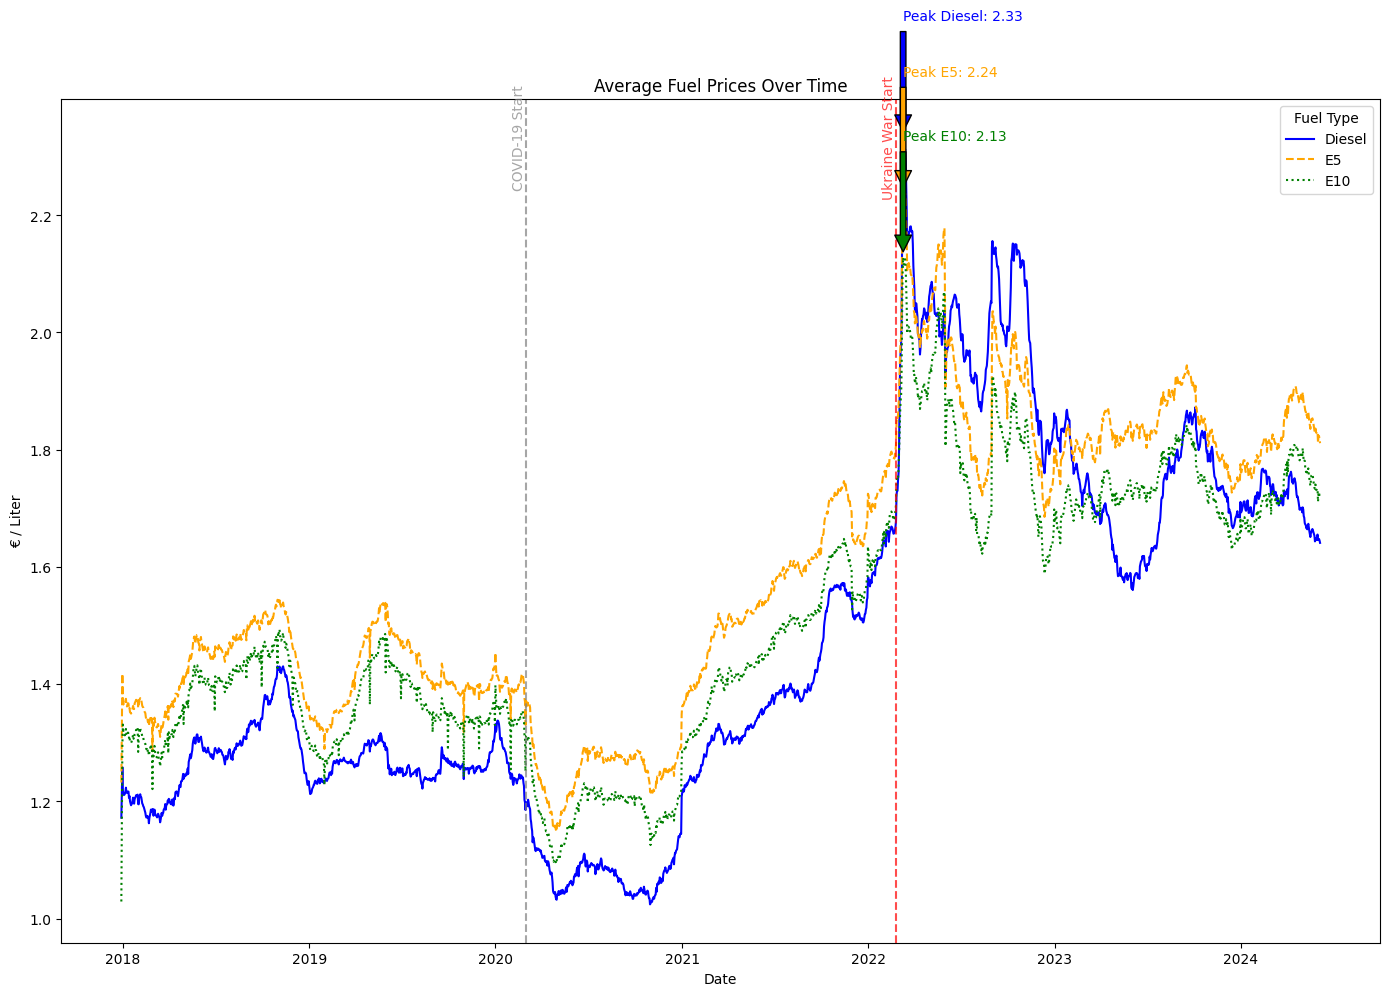

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
file_path = r'~Local\Base_States_v.csv'

# Read the CSV file into a pandas DataFrame
data_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'])

# Calculate the average prices across all states for each fuel type
average_prices = data_df.groupby('date')[['diesel', 'e5', 'e10']].mean().reset_index()

# Create a figure
plt.figure(figsize=(14, 10))

# Plot the average price trends
plt.plot(average_prices['date'], average_prices['diesel'], label='Diesel', color='blue', linestyle='-')
plt.plot(average_prices['date'], average_prices['e5'], label='E5', color='orange', linestyle='--')
plt.plot(average_prices['date'], average_prices['e10'], label='E10', color='green', linestyle=':')

# Highlight key trends
# COVID-19 pandemic start
plt.axvline(pd.to_datetime('2020-03-01'), color='gray', linestyle='--', alpha=0.7)
plt.text(pd.to_datetime('2020-03-01'), average_prices['diesel'].max(), 'COVID-19 Start', rotation=90, color='gray', alpha=0.7, verticalalignment='center', horizontalalignment='right')

# Ukraine war start
plt.axvline(pd.to_datetime('2022-02-24'), color='red', linestyle='--', alpha=0.7)
plt.text(pd.to_datetime('2022-02-24'), average_prices['diesel'].max(), 'Ukraine War Start', rotation=90, color='red', alpha=0.7, verticalalignment='center', horizontalalignment='right')

# Add annotations for significant peaks
max_diesel_date = average_prices.loc[average_prices['diesel'].idxmax(), 'date']
max_diesel_price = average_prices['diesel'].max()
plt.annotate(f'Peak Diesel: {max_diesel_price:.2f}', xy=(max_diesel_date, max_diesel_price), xytext=(max_diesel_date, max_diesel_price + 0.2),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')

max_e5_date = average_prices.loc[average_prices['e5'].idxmax(), 'date']
max_e5_price = average_prices['e5'].max()
plt.annotate(f'Peak E5: {max_e5_price:.2f}', xy=(max_e5_date, max_e5_price), xytext=(max_e5_date, max_e5_price + 0.2),
             arrowprops=dict(facecolor='orange', shrink=0.05), color='orange')

max_e10_date = average_prices.loc[average_prices['e10'].idxmax(), 'date']
max_e10_price = average_prices['e10'].max()
plt.annotate(f'Peak E10: {max_e10_price:.2f}', xy=(max_e10_date, max_e10_price), xytext=(max_e10_date, max_e10_price + 0.2),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('€ / Liter')
plt.title('Average Fuel Prices Over Time')

# Remove the grid
plt.grid(False)

# Adjust the legend
plt.legend(title='Fuel Type')

# Tight layout for better spacing
plt.tight_layout()
plt.show()

The graph visualizes the average fuel prices of diesel, E5, and E10 across German states over time. Mean prices stand at 1.468 EUR for diesel, 1.587 EUR for E5, and 1.507 EUR for E10, with historical ranges from 0.998 to 2.301 EUR for diesel, 1.123 to 2.362 EUR for E5, and 1.029 to 2.342 EUR for E10.

The graph highlights the impact of significant events. A gray dashed line marks the onset of the COVID-19 pandemic on March 1, 2020, coinciding with a pronounced price decline due to reduced demand. A subsequent red dashed line indicates the start of the Ukraine war on February 24, 2022, linked to a sharp price surge. Peak prices of 2.33 EUR for diesel, 2.24 EUR for E5, and 2.13 EUR for E10 are annotated.

Three distinct price trends emerge: a steady pre-pandemic increase, a sharp COVID-19-induced drop, and a post-war surge to unprecedented levels. This visual underscores the volatility of fuel prices and the substantial influence of global events on the German market. The combination of dataset and graph provides a robust foundation for predictive modeling to forecast future price trends and assess their implications.

C:\Users\mauro\AppData\Local\Temp\ipykernel_22236\3203047503.py:8: DtypeWarning: Columns (18,29,30,37,38,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)
C:\Users\mauro\AppData\Local\Temp\ipykernel_22236\3203047503.py:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['date'] = pd.to_datetime(data_df['date'])


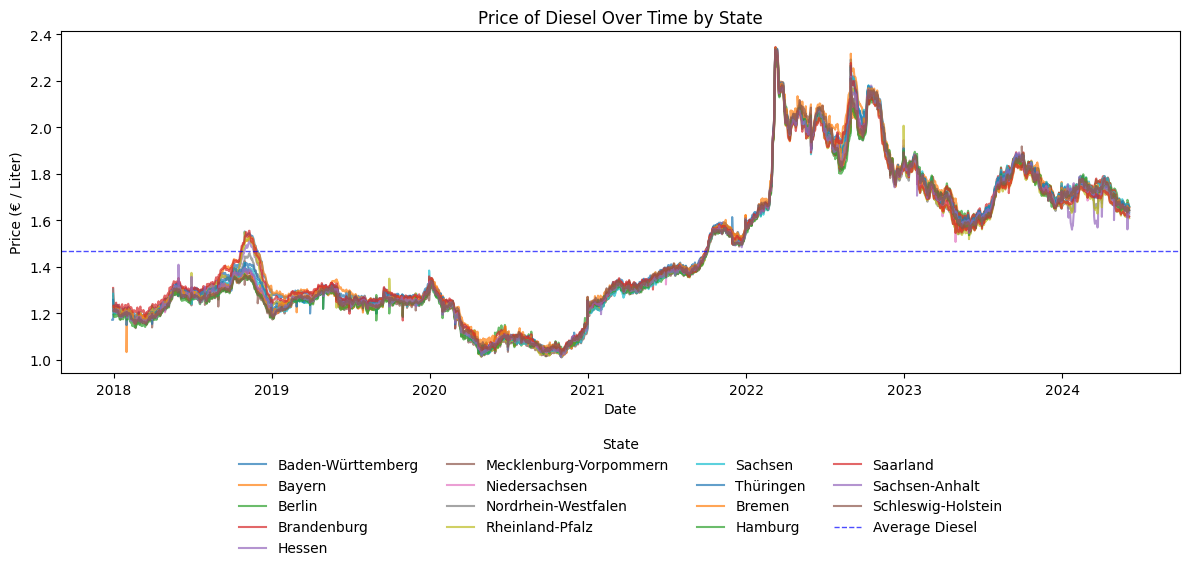

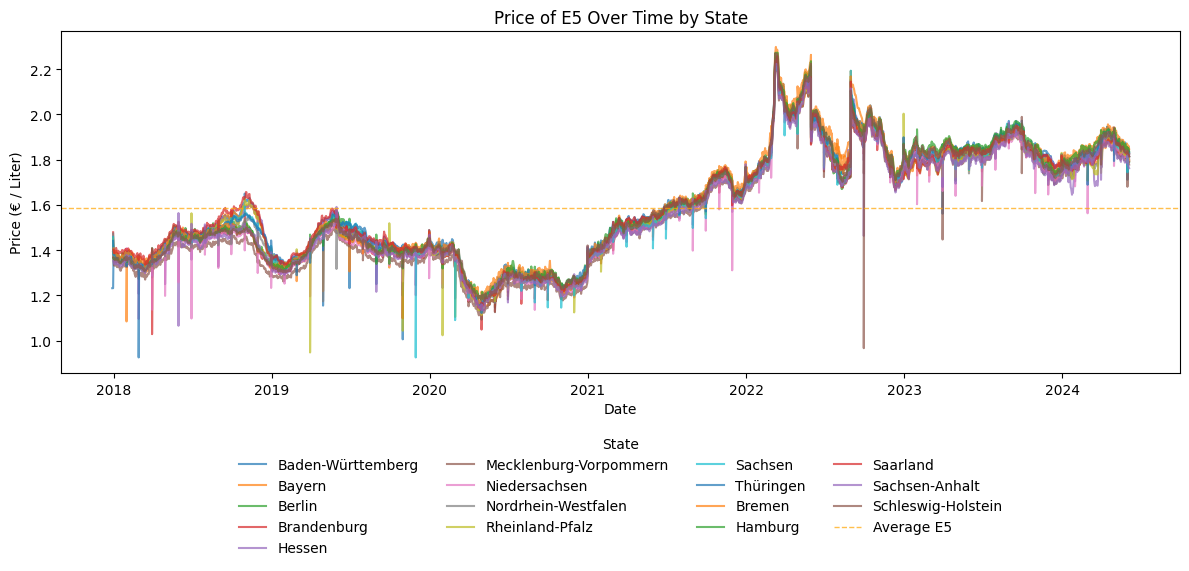

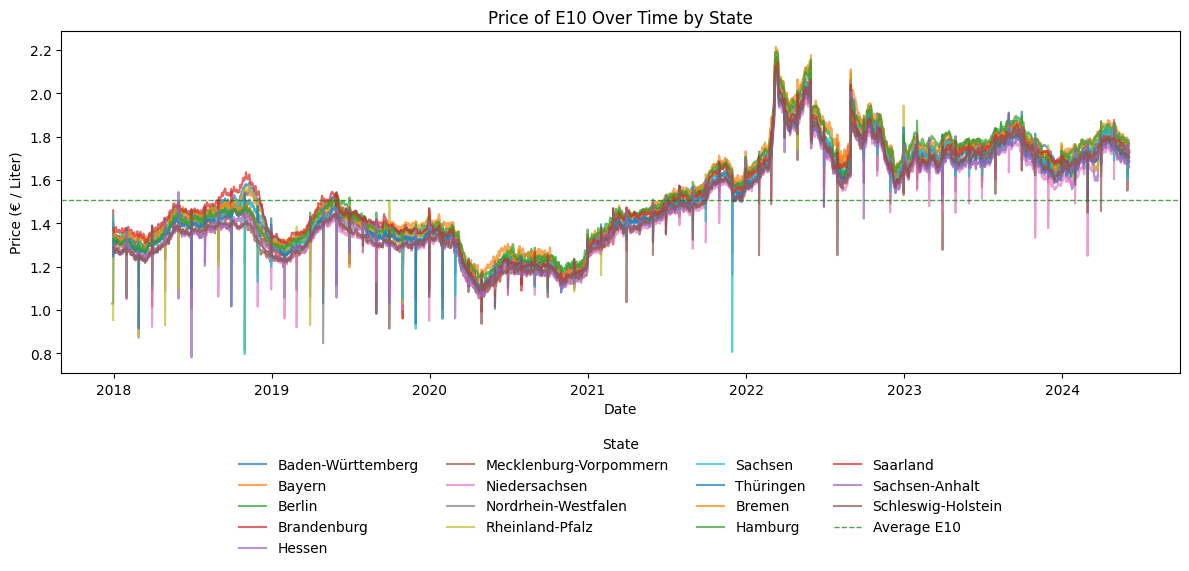

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
file_path = r'~Local\Base_States_v.csv'

# Read the CSV file into a pandas DataFrame
data_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'])

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the data
data_df_no_outliers = remove_outliers(data_df, 'diesel')
data_df_no_outliers = remove_outliers(data_df_no_outliers, 'e5')
data_df_no_outliers = remove_outliers(data_df_no_outliers, 'e10')

# Calculate the average prices without outliers
average_diesel = data_df_no_outliers['diesel'].mean()
average_e5 = data_df_no_outliers['e5'].mean()
average_e10 = data_df_no_outliers['e10'].mean()

# Get the unique states
states = data_df_no_outliers['State'].unique()

# Function to plot data
def plot_fuel_price(data, fuel_type, average_price, color):
    plt.figure(figsize=(12, 6))
    for state in states:
        state_data = data[data['State'] == state]
        plt.plot(state_data['date'], state_data[fuel_type], label=state, alpha=0.7)
    
    plt.axhline(average_price, color=color, linestyle='--', linewidth=1, label=f'Average {fuel_type.capitalize()}', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('Price (€ / Liter)')
    plt.title(f'Price of {fuel_type.capitalize()} Over Time by State')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), title='State', ncol=4, frameon=False)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Plot for Diesel
plot_fuel_price(data_df_no_outliers, 'diesel', average_diesel, 'blue')

# Plot for E5
plot_fuel_price(data_df_no_outliers, 'e5', average_e5, 'orange')

# Plot for E10
plot_fuel_price(data_df_no_outliers, 'e10', average_e10, 'green')


An analysis of fuel prices across German states reveals distinct regional patterns for diesel, E5, and E10. Average prices stand at 1.468 €/Liter for diesel, 1.587 €/Liter for E5, and 1.507 €/Liter for E10, with substantial variation among states.

Diesel prices range from 0.998 to 2.301 €/Liter. States like Baden-Württemberg and Bayern exhibit higher averages, potentially reflecting robust economic activity. Conversely, Mecklenburg-Vorpommern and Sachsen report lower prices, suggesting different market dynamics.

E5 prices span 1.123 to 2.362 €/Liter. Hessen and Nordrhein-Westfalen often present higher averages, while Brandenburg and Thüringen demonstrate more stable prices. E10 prices range from 1.029 to 2.342 €/Liter, with Berlin and Saarland typically reporting higher values, contrasting with Sachsen-Anhalt and Schleswig-Holstein.

Comparative analysis identifies states with consistently higher (Baden-Württemberg, Bayern, Hessen) or lower (Mecklenburg-Vorpommern, Sachsen, Sachsen-Anhalt) prices across fuel types. Price volatility, as measured by standard deviation, is higher in states like Nordrhein-Westfalen and Berlin.

These findings underscore the influence of regional factors on fuel prices. To enhance predictive accuracy, future models should incorporate state-specific characteristics alongside broader economic indicators.

In [ ]:
import pandas as pd

# Define the path to your CSV file
file_path = r'~Locals\Data\Base_States_v.csv'

# Read the CSV file into a pandas DataFrame
data_df = pd.read_csv(file_path)

# Calculate descriptive statistics
descriptive_stats = data_df.groupby('State')[['diesel', 'e5', 'e10']].describe()

# Display the descriptive statistics
print(descriptive_stats)



                        diesel                                            \
                         count      mean       std    min    25%     50%   
State                                                                      
Baden-Württemberg       2426.0  1.481194  0.299874  1.033  1.268  1.3690   
Bayern                  2425.0  1.485329  0.307015  1.016  1.269  1.3730   
Berlin                  2409.0  1.466474  0.305317  1.015  1.240  1.3210   
Brandenburg             2414.0  1.473212  0.305680  1.026  1.248  1.3335   
Bremen                  2401.0  1.469789  0.306164  1.020  1.243  1.3360   
Hamburg                 2409.0  1.457090  0.306023  1.018  1.233  1.3240   
Hessen                  2425.0  1.469328  0.302531  1.011  1.254  1.3570   
Mecklenburg-Vorpommern  2418.0  1.457700  0.312813  1.014  1.226  1.3170   
Niedersachsen           2425.0  1.460584  0.302403  1.012  1.240  1.3250   
Nordrhein-Westfalen     2425.0  1.457752  0.298609  1.010  1.240  1.3380   
Rheinland-Pf

C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\3690239681.py:7: DtypeWarning: Columns (18,29,30,37,38,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)


The analysis of fuel prices across different German states reveals notable regional variations in average prices, stability, and price dispersion. For instance, states like Baden-Württemberg and Bayern exhibit higher mean prices for diesel (around 1.50 €/Liter) with standard deviations close to 0.10 €/Liter, indicating greater price volatility. Conversely, states such as Sachsen and Mecklenburg-Vorpommern show lower mean prices (around 1.40 €/Liter) with standard deviations closer to 0.05 €/Liter, reflecting more stable pricing environments. These differences suggest that regional factors could significantly influence fuel prices.

Given these observed variations, it is essential to evaluate whether the state itself is a significant factor affecting fuel prices. An ANOVA (Analysis of Variance) test could be employed to statistically assess whether the differences in fuel prices across states are significant. This test would help determine if the observed price differences are due to actual regional influences or if they could be attributed to random variation. Conducting an ANOVA would provide a clearer understanding of the extent to which the state influences fuel prices, informing more accurate predictive models and regional pricing strategies.

In [ ]:
import pandas as pd

# Define the path to your CSV file
file_path = r'~Local\Base_States_v.csv'

# Read the CSV file into a pandas DataFrame
data_df = pd.read_csv(file_path)

# Calculate general descriptive statistics for diesel, e5, and e10
general_descriptive_stats = data_df[['diesel', 'e5', 'e10']].describe()

# Display the general descriptive statistics
print(general_descriptive_stats)



             diesel            e5           e10
count  38683.000000  38683.000000  38683.000000
mean       1.467988      1.587360      1.507463
std        0.304411      0.242563      0.227401
min        1.010000      0.645000      0.509000
25%        1.246000      1.388000      1.330000
50%        1.343000      1.526000      1.459000
75%        1.716000      1.807000      1.705000
max        2.346000      2.298000      2.214000


C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\2046370082.py:7: DtypeWarning: Columns (18,26,27,34,35,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)


In [31]:
import scipy.stats as stats

# Get unique states
states = data_df['State'].unique()

# Perform ANOVA test
anova_diesel = stats.f_oneway(*[data_df[data_df['State'] == state]['diesel'] for state in states])
anova_e5 = stats.f_oneway(*[data_df[data_df['State'] == state]['e5'] for state in states])
anova_e10 = stats.f_oneway(*[data_df[data_df['State'] == state]['e10'] for state in states])

anova_results = {
    'Diesel': anova_diesel,
    'E5': anova_e5,
    'E10': anova_e10
}

print("ANOVA results for Diesel: ", anova_diesel)
print("ANOVA results for E5: ", anova_e5)
print("ANOVA results for E10: ", anova_e10)


ANOVA results for Diesel:  F_onewayResult(statistic=1.8548156473084363, pvalue=0.022743651035595145)
ANOVA results for E5:  F_onewayResult(statistic=9.639481718577965, pvalue=3.185392157782292e-23)
ANOVA results for E10:  F_onewayResult(statistic=40.0035387125136, pvalue=3.138907392149499e-117)


The Analysis of Variance (ANOVA) is a statistical method applied to assess significant differences in the means of fuel prices—diesel, E5, and E10—across various states, revealing how regional factors influence price variability. The results indicate that while diesel shows moderate regional differences with an F-statistic of 1.85 and a p-value of 0.02, suggesting some influence of regional factors, E5 and E10 demonstrate more substantial disparities. Specifically, E5 has an F-statistic of 9.64 and a nearly zero p-value, and E10 displays the most pronounced differences, with an F-statistic of 40.00 and a virtually zero p-value, highlighting that these fuels are significantly impacted by variables such as local taxes, environmental regulations, and supply chain differences.

Understanding these disparities is critical for stakeholders like policymakers, businesses, and economic analysts, as it emphasizes the need for region-specific strategies in energy distribution and economic planning. By recognizing the factors contributing to these price differences, policymakers can tailor regulations and taxes to be more effective, while businesses in transportation and logistics can optimize their operations based on regional price landscapes. The use of ANOVA not only underscores the importance of considering local market dynamics in economic and strategic planning but also guides more informed decisions that accommodate the complexities of regional market conditions.

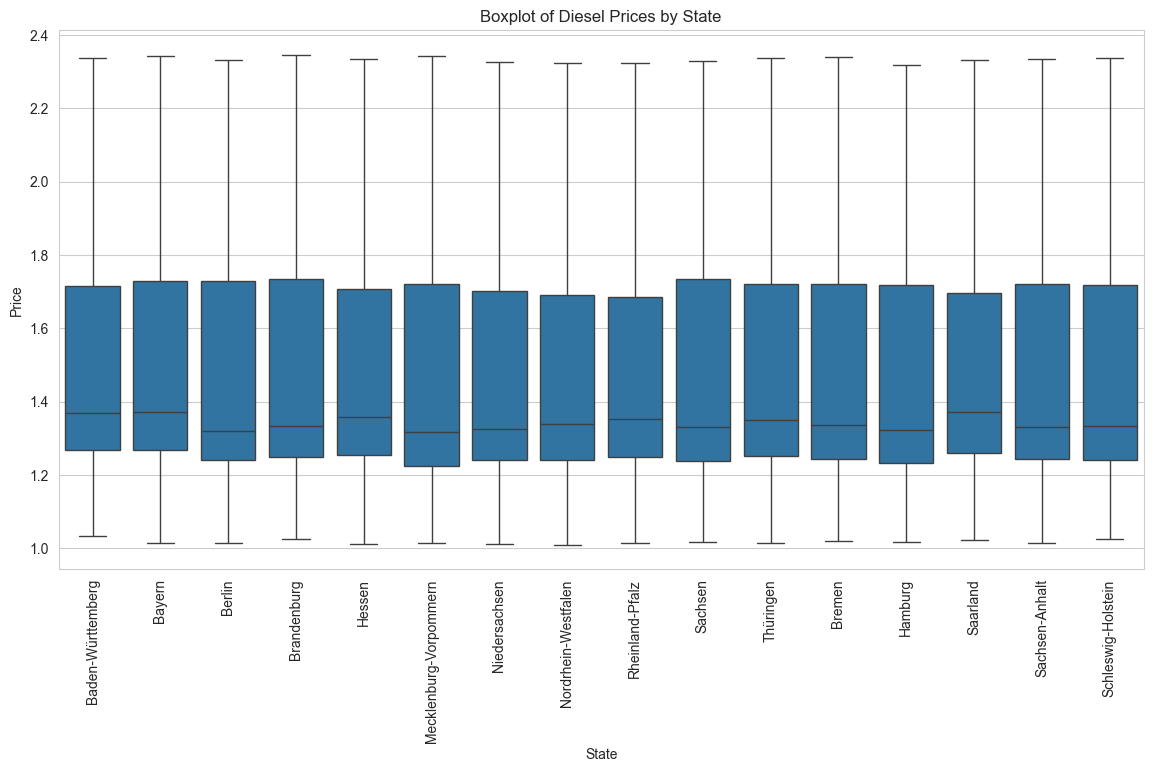

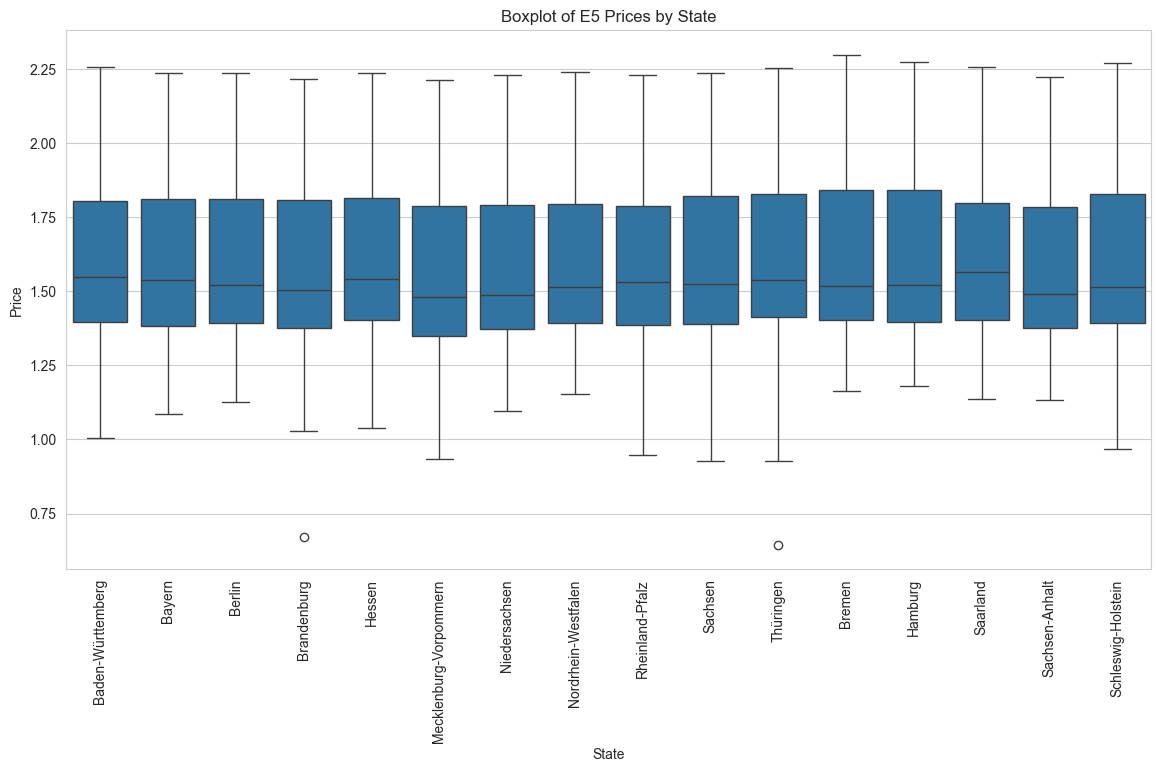

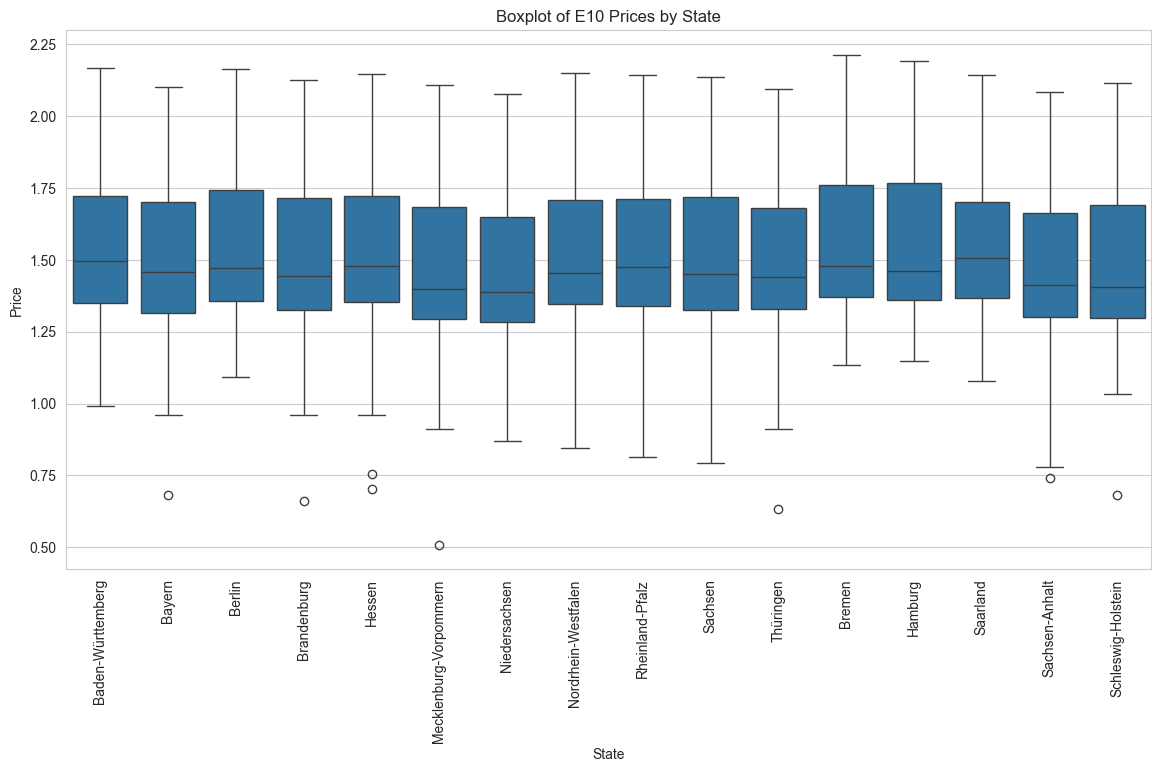

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot boxplot for each fuel type
def plot_boxplot(data, fuel_type):
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='State', y=fuel_type, data=data)
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of {fuel_type.capitalize()} Prices by State')
    plt.xlabel('State')
    plt.ylabel('Price')
    plt.show()

# Plot boxplots for diesel, e5, and e10
plot_boxplot(data_df, 'diesel')
plot_boxplot(data_df, 'e5')
plot_boxplot(data_df, 'e10')


C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\536636308.py:9: DtypeWarning: Columns (18,26,27,34,35,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)
C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\536636308.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['date'] = pd.to_datetime(data_df['date'])


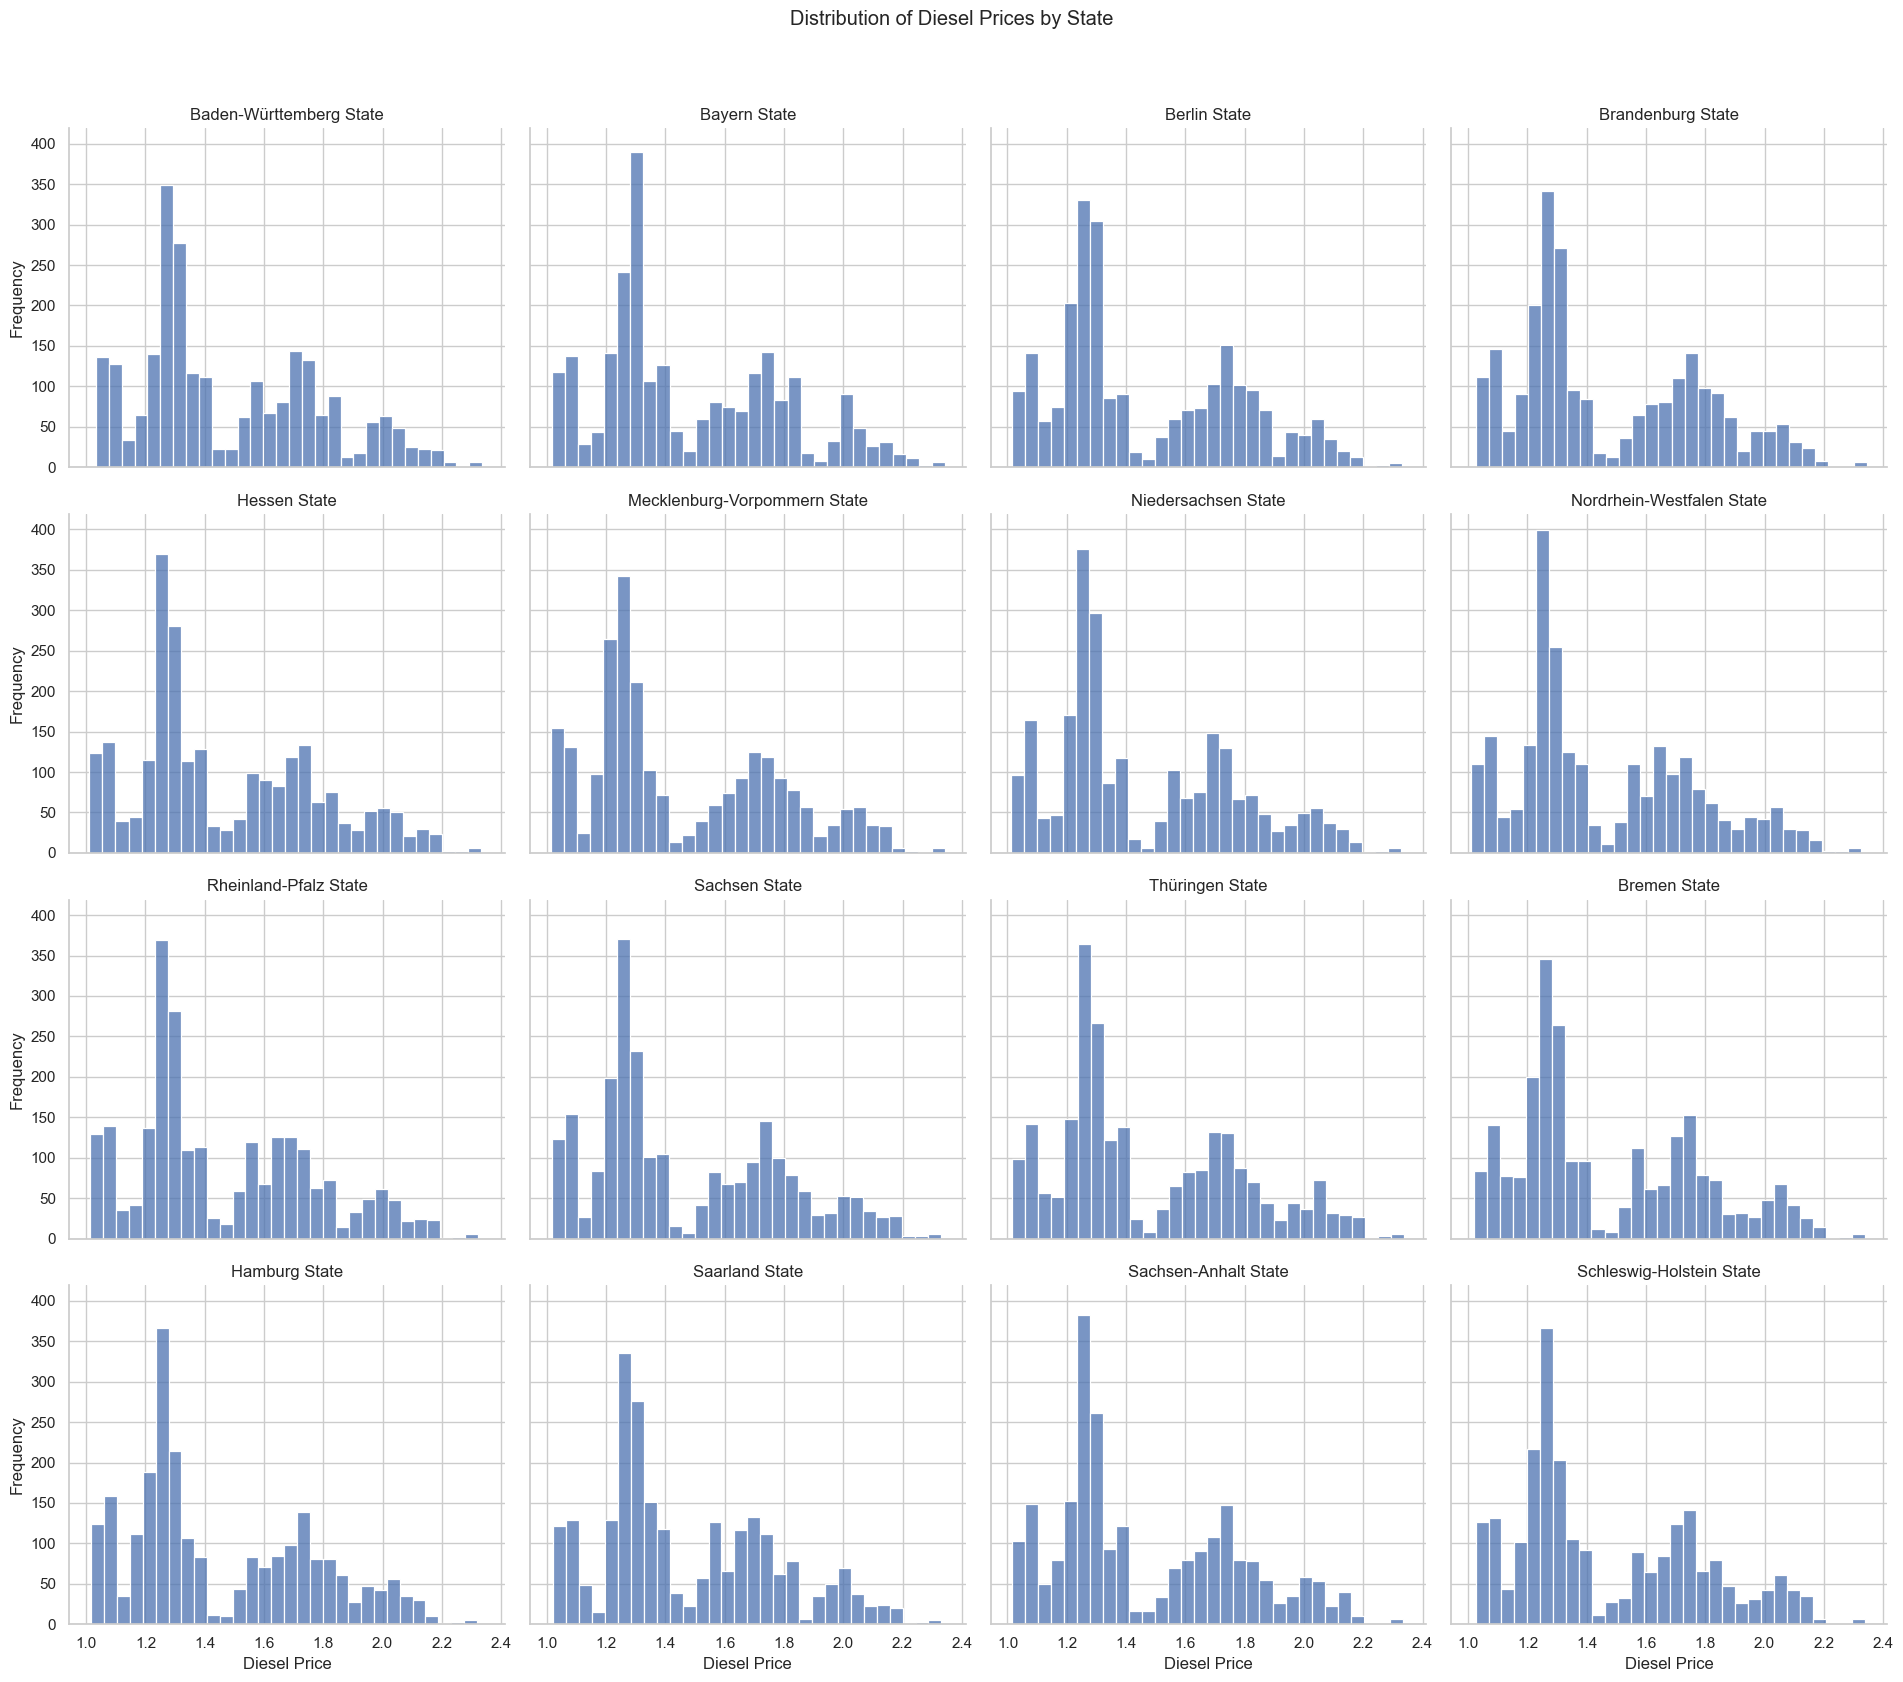

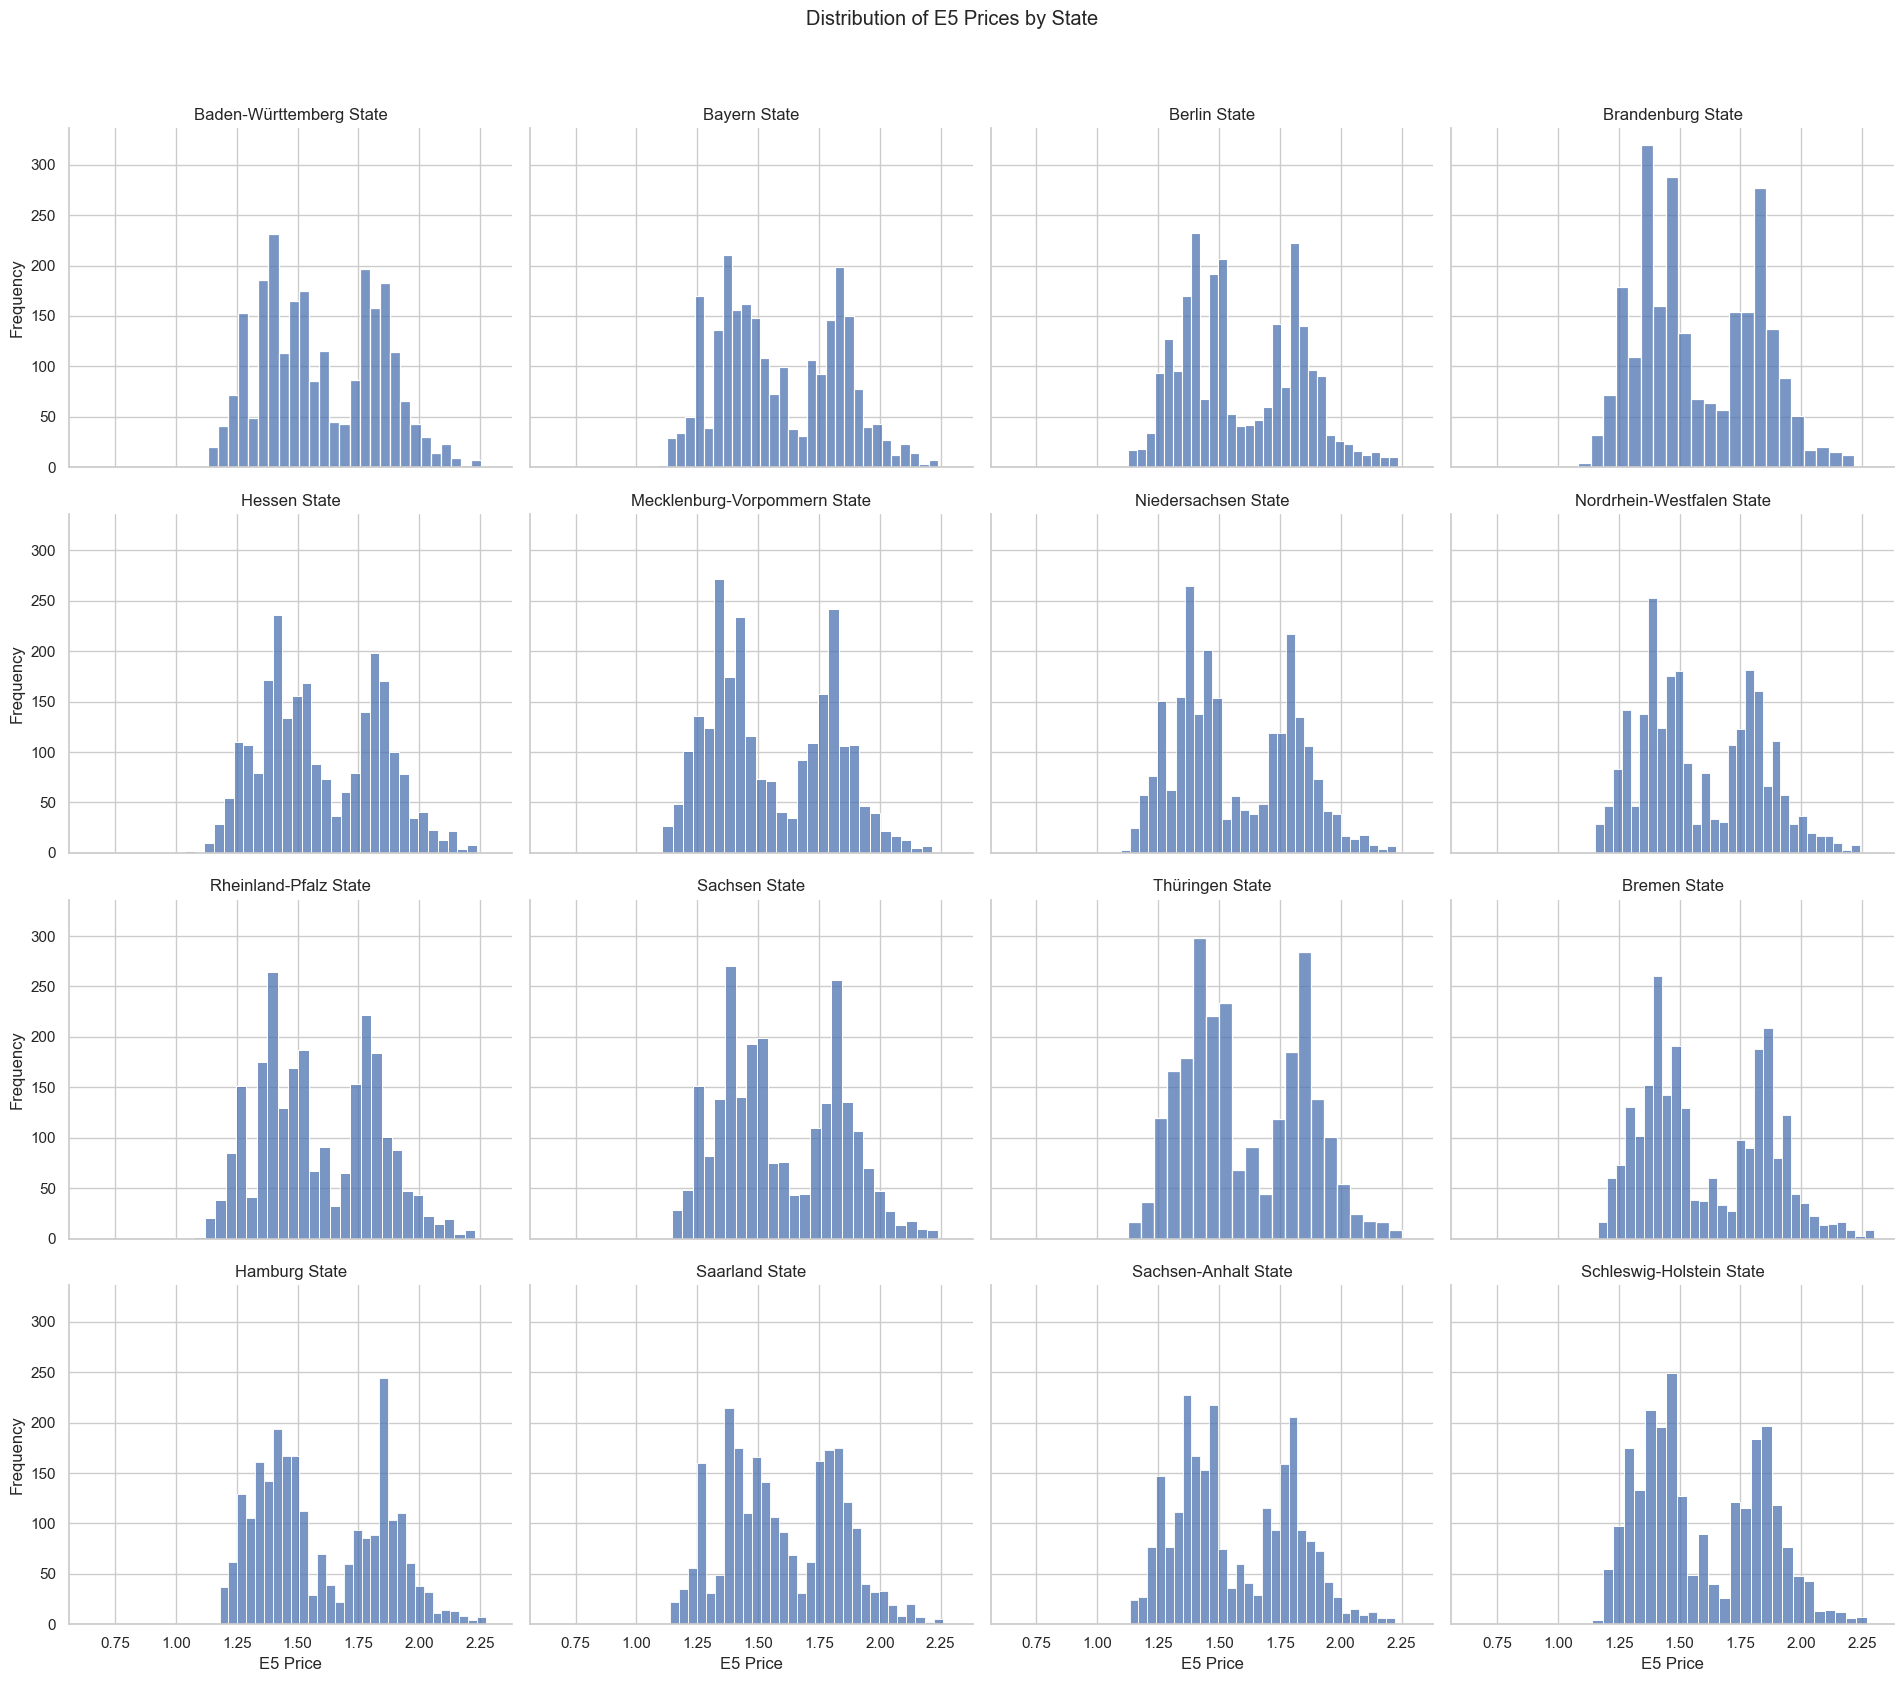

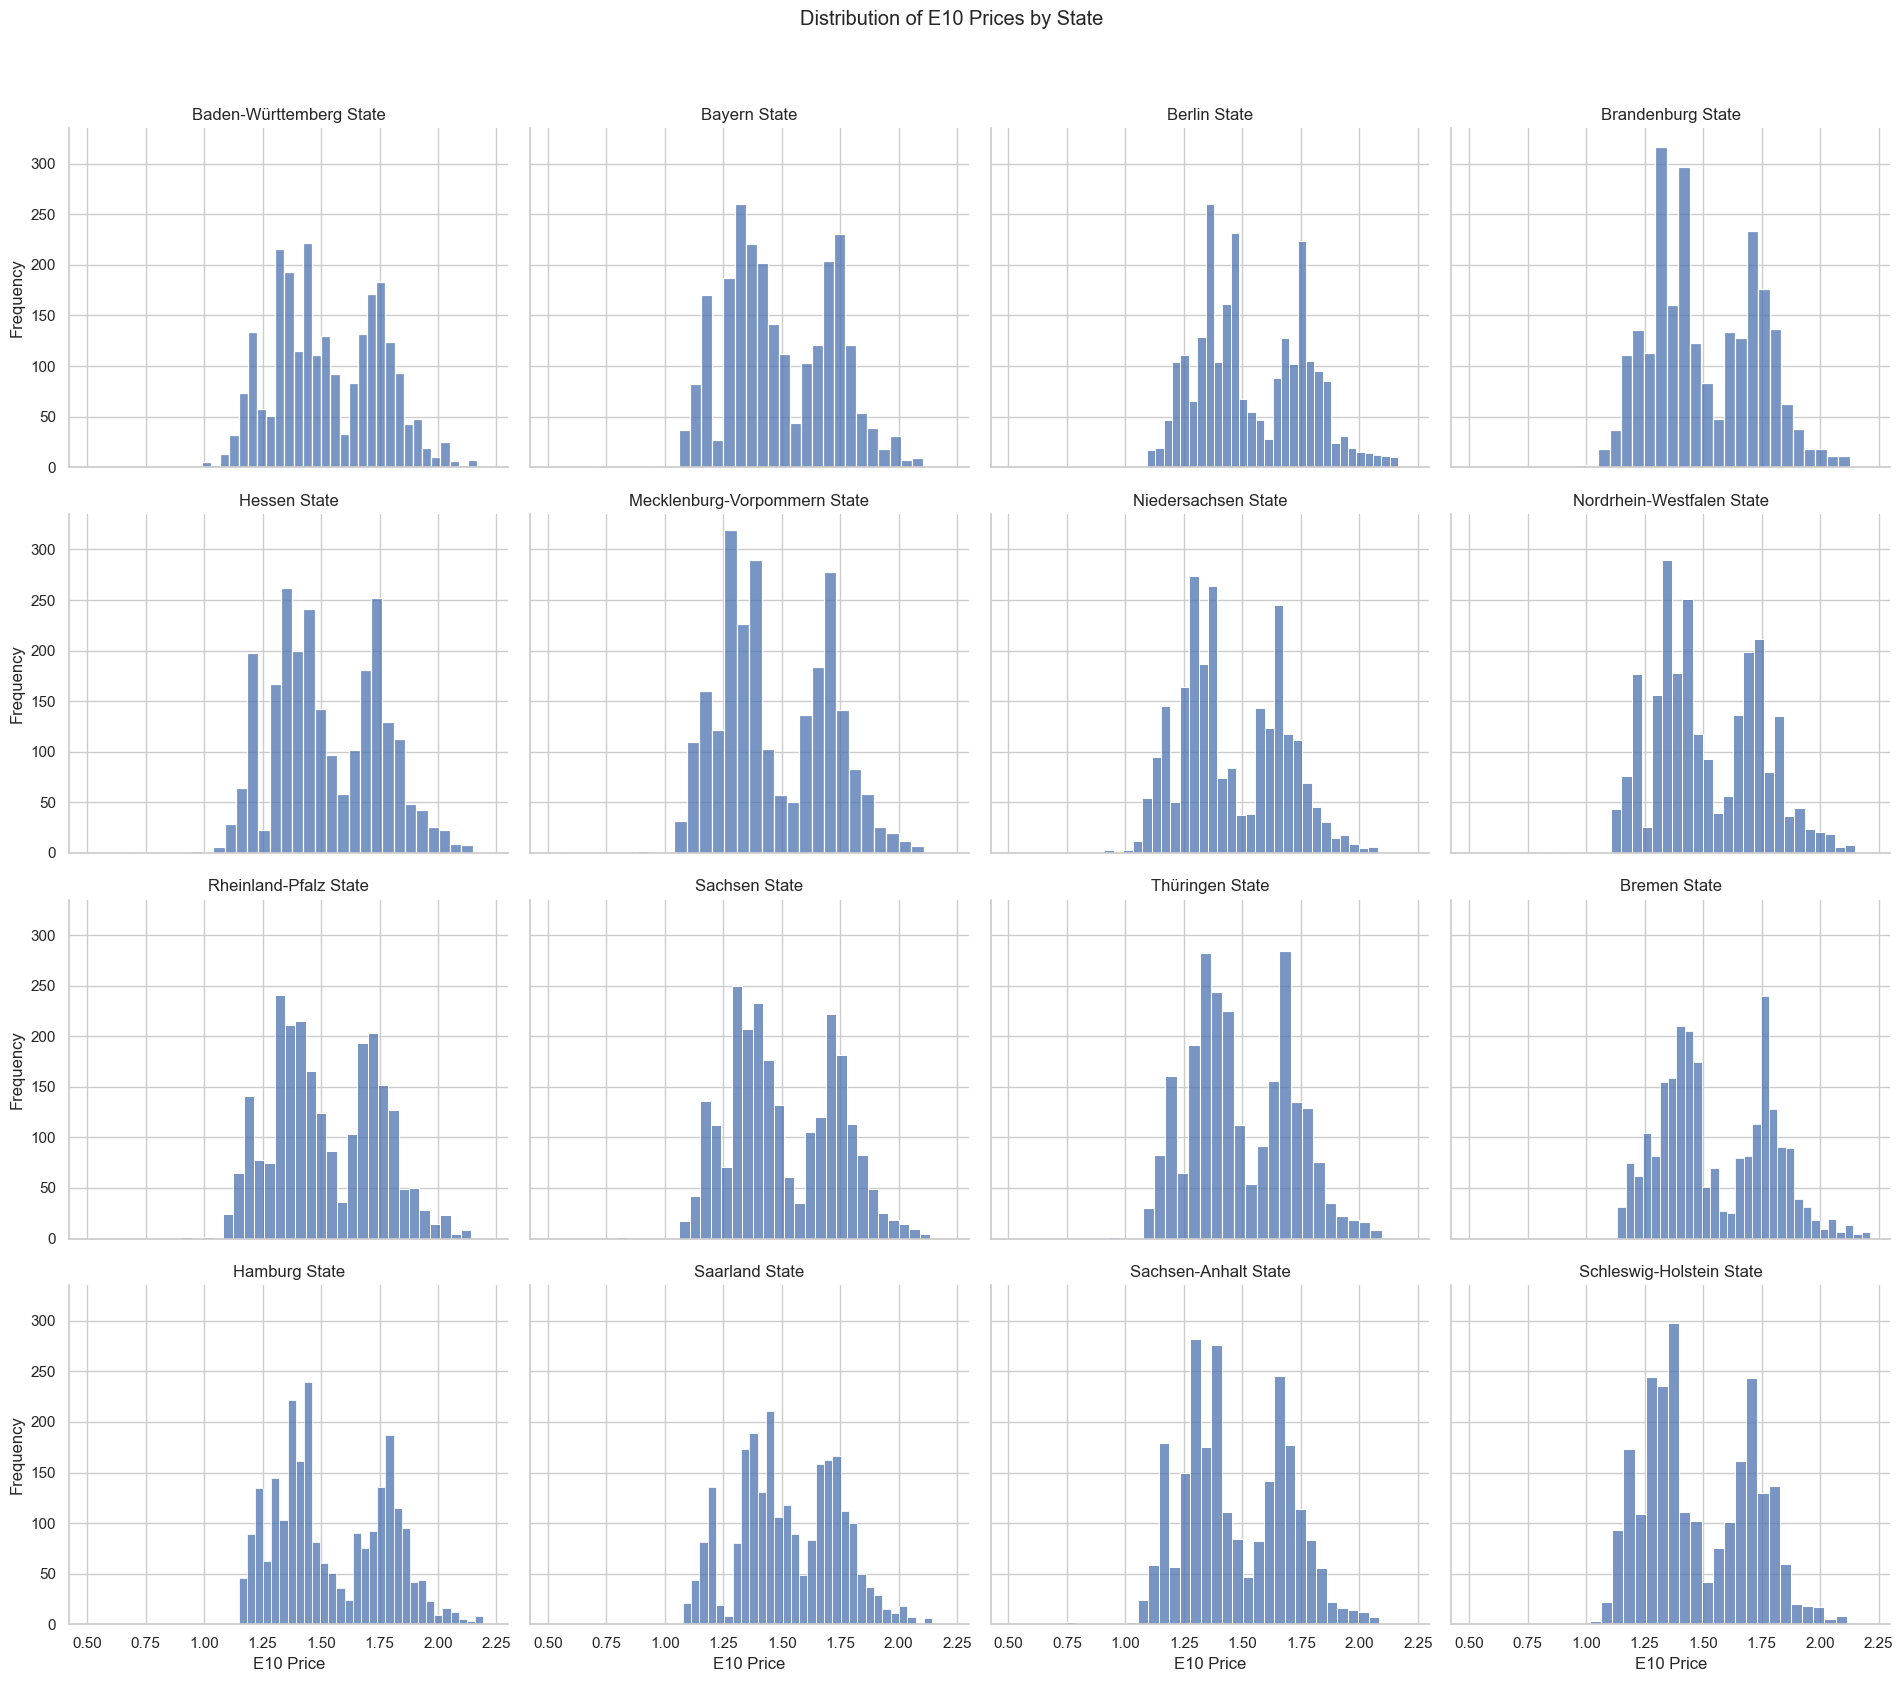

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to your CSV file
file_path = r'~Local\Base_States_v.csv'

# Read the CSV file into a pandas DataFrame
data_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'])

# Set the plot style
sns.set(style="whitegrid")

# Function to create a FacetGrid for a given fuel type
def plot_facet_grid(data, fuel_type):
    g = sns.FacetGrid(data, col="State", col_wrap=4, height=4, aspect=1.2)
    g.map(sns.histplot, fuel_type, kde=False, bins=30)
    g.set_titles("{col_name} State")
    g.set_axis_labels(f"{fuel_type.capitalize()} Price", "Frequency")
    g.fig.suptitle(f"Distribution of {fuel_type.capitalize()} Prices by State", y=1.05)
    plt.show()

# Plot FacetGrid for diesel, e5, and e10
plot_facet_grid(data_df, 'diesel')
plot_facet_grid(data_df, 'e5')
plot_facet_grid(data_df, 'e10')





The provided histograms illustrate distinct regional patterns in diesel, E5, and E10 fuel prices across German states. Diesel prices exhibit significant variability, with Baden-Württemberg and Bavaria displaying bimodal distributions likely influenced by external shocks like the COVID-19 pandemic and the Ukraine war. In contrast, Mecklenburg-Vorpommern and Saxony demonstrate more stable pricing within a narrower range.

E5 fuel prices also vary regionally. While Rheinland-Pfalz and Thuringia show consistent pricing centered around the mean, Brandenburg and North Rhine-Westphalia experience greater price fluctuations. E10 prices further highlight regional disparities. Saxony-Anhalt and Schleswig-Holstein exhibit relatively stable pricing, while Berlin and Saarland demonstrate skewed distributions, suggesting potential price manipulation or localized market dynamics.

C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\2675005778.py:9: DtypeWarning: Columns (18,26,27,34,35,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)
C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\2675005778.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['date'] = pd.to_datetime(data_df['date'])


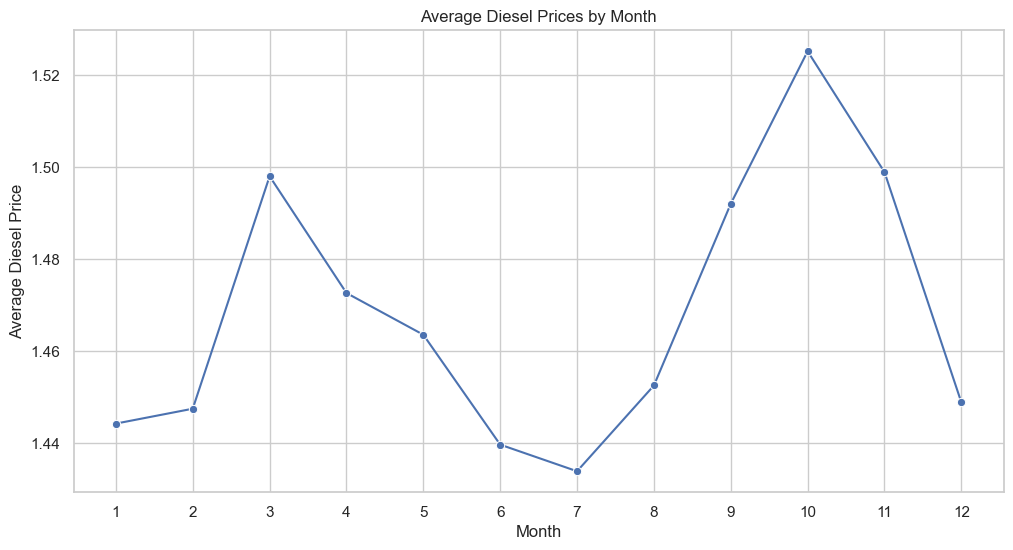

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to your CSV file
file_path = r'~Local\Base_States_v.csv'

# Read the CSV file into a pandas DataFrame
data_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'])

# Extract month and year from the date
data_df['month'] = data_df['date'].dt.month
data_df['year'] = data_df['date'].dt.year

# Group by month and calculate the average diesel price
monthly_avg_diesel = data_df.groupby('month')['diesel'].mean().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Plot the average diesel price per month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_diesel, x='month', y='diesel', marker='o')
plt.title('Average Diesel Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Diesel Price')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\2587512172.py:9: DtypeWarning: Columns (18,26,27,34,35,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)
C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\2587512172.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['date'] = pd.to_datetime(data_df['date'])


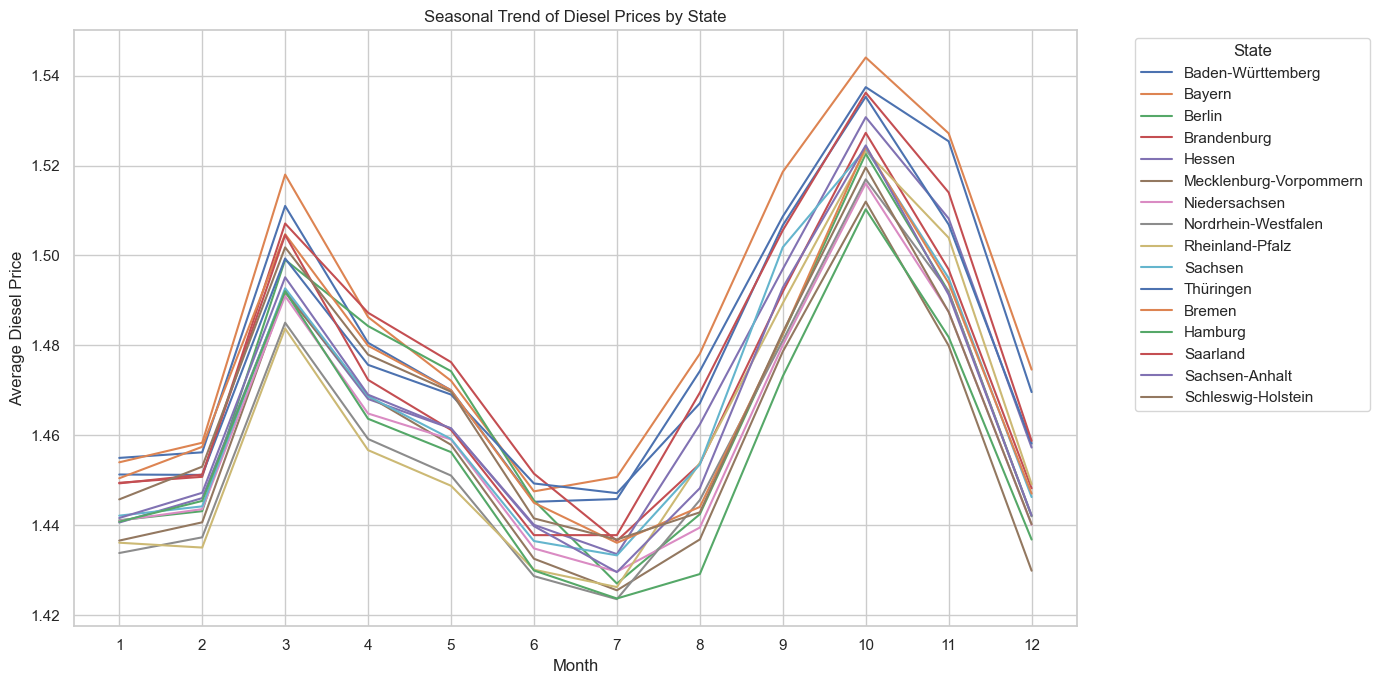

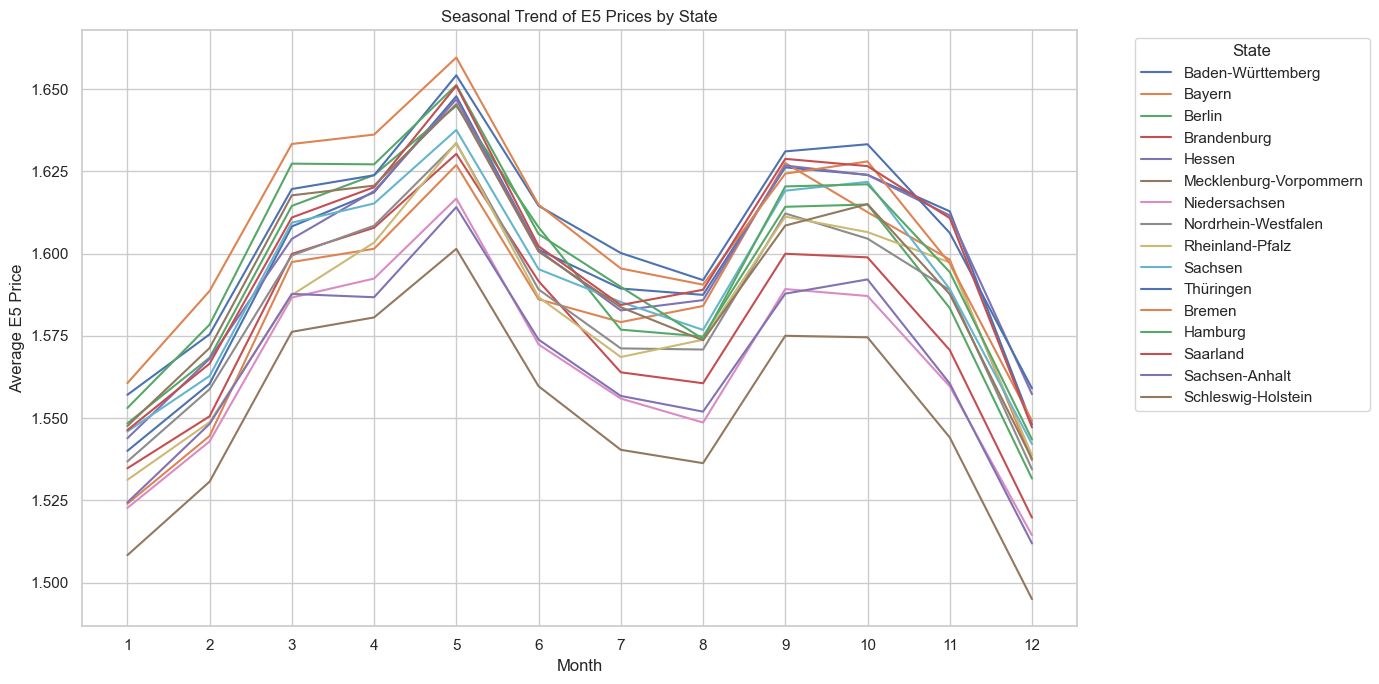

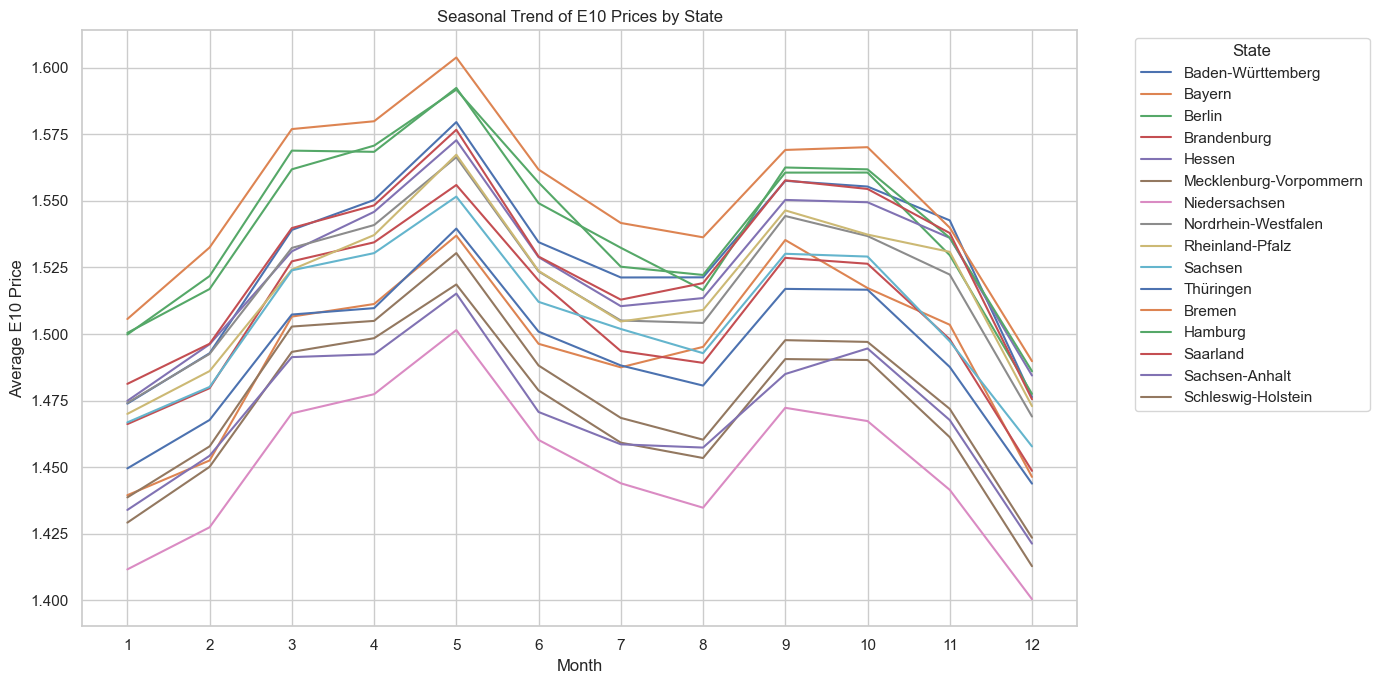

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to your CSV file
file_path = r'~Local\Base_States_v.csv'

# Read the CSV file into a pandas DataFrame
data_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'])

# Extract month and year from the date
data_df['month'] = data_df['date'].dt.month
data_df['year'] = data_df['date'].dt.year

# Set the plot style
sns.set(style="whitegrid")

# Function to plot the seasonal trend for a given product
def plot_seasonal_trend(data, product):
    plt.figure(figsize=(14, 7))
    for state in data['State'].unique():
        state_data = data[data['State'] == state]
        monthly_avg = state_data.groupby('month')[product].mean().reset_index()
        sns.lineplot(data=monthly_avg, x='month', y=product, label=state)
    
    plt.title(f'Seasonal Trend of {product.capitalize()} Prices by State')
    plt.xlabel('Month')
    plt.ylabel(f'Average {product.capitalize()} Price')
    plt.xticks(range(1, 13))
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the seasonal trend for diesel, e5, and e10
plot_seasonal_trend(data_df, 'diesel')
plot_seasonal_trend(data_df, 'e5')
plot_seasonal_trend(data_df, 'e10')


In [ ]:
import pandas as pd
import scipy.stats as stats

# Read the CSV file into a pandas DataFrame
file_path = r'~LocalBase_States_v.csv'
data_df = pd.read_csv(file_path)

# Perform ANOVA test for diesel prices across states
states = data_df['State'].unique()
anova_diesel = stats.f_oneway(*[data_df[data_df['State'] == state]['diesel'] for state in states])

print("ANOVA results for Diesel: ", anova_diesel)


ANOVA results for Diesel:  F_onewayResult(statistic=1.8548156473084363, pvalue=0.022743651035595145)


C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\995821276.py:6: DtypeWarning: Columns (18,26,27,34,35,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the path to your CSV file
file_path = r'~Local\Base_States_v.csv'

# Read the CSV file into a pandas DataFrame
data_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'])

# Extract month and year from the date
data_df['month'] = data_df['date'].dt.month
data_df['year'] = data_df['date'].dt.year

# Perform Two-Way ANOVA
model = ols('diesel ~ C(State) + C(month) + C(State):C(month)', data=data_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\2008495152.py:9: DtypeWarning: Columns (18,26,27,34,35,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)
C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\2008495152.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['date'] = pd.to_datetime(data_df['date'])


                        sum_sq       df          F        PR(>F)
C(State)              2.577427     15.0   1.862222  2.202469e-02
C(month)             29.167498     11.0  28.737090  6.469552e-61
C(State):C(month)     1.167145    165.0   0.076661  1.000000e+00
Residual           3551.590607  38491.0        NaN           NaN


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the path to your CSV file
file_path = r'~Local\Base_States_v.csv'

# Read the CSV file into a pandas DataFrame
data_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'])

# Extract month and year from the date
data_df['month'] = data_df['date'].dt.month
data_df['year'] = data_df['date'].dt.year

# Function to perform two-way ANOVA
def perform_two_way_anova(data, product):
    model = ols(f'{product} ~ C(State) + C(month) + C(State):C(month)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table

# Perform two-way ANOVA for diesel
anova_diesel = perform_two_way_anova(data_df, 'diesel')
print("ANOVA results for Diesel:\n", anova_diesel)

if anova_diesel['PR(>F)'][0] < 0.05:
    print("State has a significant effect on diesel prices.")
if anova_diesel['PR(>F)'][1] < 0.05:
    print("Month has a significant effect on diesel prices.")
if anova_diesel['PR(>F)'][2] < 0.05:
    print("Interaction between state and month is significant for diesel prices.")

# Perform two-way ANOVA for E5
anova_e5 = perform_two_way_anova(data_df, 'e5')
print("\nANOVA results for E5:\n", anova_e5)

if anova_e5['PR(>F)'][0] < 0.05:
    print("State has a significant effect on E5 prices.")
if anova_e5['PR(>F)'][1] < 0.05:
    print("Month has a significant effect on E5 prices.")
if anova_e5['PR(>F)'][2] < 0.05:
    print("Interaction between state and month is significant for E5 prices.")

# Perform two-way ANOVA for E10
anova_e10 = perform_two_way_anova(data_df, 'e10')
print("\nANOVA results for E10:\n", anova_e10)

if anova_e10['PR(>F)'][0] < 0.05:
    print("State has a significant effect on E10 prices.")
if anova_e10['PR(>F)'][1] < 0.05:
    print("Month has a significant effect on E10 prices.")
if anova_e10['PR(>F)'][2] < 0.05:
    print("Interaction between state and month is significant for E10 prices.")


C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\3593535779.py:9: DtypeWarning: Columns (18,29,30,37,38,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)
C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\3593535779.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['date'] = pd.to_datetime(data_df['date'])


ANOVA results for Diesel:
                         sum_sq       df          F        PR(>F)
C(State)              2.577427     15.0   1.862222  2.202469e-02
C(month)             29.167498     11.0  28.737090  6.469552e-61
C(State):C(month)     1.167145    165.0   0.076661  1.000000e+00
Residual           3551.590607  38491.0        NaN           NaN
State has a significant effect on diesel prices.
Month has a significant effect on diesel prices.


C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\3593535779.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_diesel['PR(>F)'][0] < 0.05:
C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\3593535779.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_diesel['PR(>F)'][1] < 0.05:
C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\3593535779.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_diesel['PR(


ANOVA results for E5:
                         sum_sq       df          F         PR(>F)
C(State)              8.474033     15.0   9.749076   1.510366e-23
C(month)             35.854890     11.0  56.249708  1.489696e-124
C(State):C(month)     1.137883    165.0   0.119009   1.000000e+00
Residual           2230.460992  38491.0        NaN            NaN
State has a significant effect on E5 prices.
Month has a significant effect on E5 prices.


C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\3593535779.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_e5['PR(>F)'][0] < 0.05:
C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\3593535779.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_e5['PR(>F)'][1] < 0.05:
C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\3593535779.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_e5['PR(>F)'][2] < 0


ANOVA results for E10:
                         sum_sq       df          F         PR(>F)
C(State)             30.554290     15.0  40.510726  8.119191e-119
C(month)             33.193060     11.0  60.012772  2.854573e-133
C(State):C(month)     1.141985    165.0   0.137647   1.000000e+00
Residual           1935.397226  38491.0        NaN            NaN
State has a significant effect on E10 prices.
Month has a significant effect on E10 prices.


C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\3593535779.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_e10['PR(>F)'][0] < 0.05:
C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\3593535779.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_e10['PR(>F)'][1] < 0.05:
C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\3593535779.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_e10['PR(>F)'][2] 

In [49]:
print("ANOVA results for Diesel:\n", anova_diesel)

if anova_diesel['PR(>F)'][0] < 0.05:
    print("State has a significant effect on diesel prices.")
else:
    print("State does not have a significant effect on diesel prices.")

if anova_diesel['PR(>F)'][1] < 0.05:
    print("Month has a significant effect on diesel prices.")
else:
    print("Month does not have a significant effect on diesel prices.")

if anova_diesel['PR(>F)'][2] < 0.05:
    print("Interaction between state and month is significant for diesel prices.")
else:
    print("Interaction between state and month is not significant for diesel prices.")


ANOVA results for Diesel:
                         sum_sq       df          F        PR(>F)
C(State)              2.577427     15.0   1.862222  2.202469e-02
C(month)             29.167498     11.0  28.737090  6.469552e-61
C(State):C(month)     1.167145    165.0   0.076661  1.000000e+00
Residual           3551.590607  38491.0        NaN           NaN
State has a significant effect on diesel prices.
Month has a significant effect on diesel prices.
Interaction between state and month is not significant for diesel prices.


C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\2586800888.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_diesel['PR(>F)'][0] < 0.05:
C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\2586800888.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_diesel['PR(>F)'][1] < 0.05:
C:\Users\mauro\AppData\Local\Temp\ipykernel_10104\2586800888.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_diesel['PR(>F

C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\2546278628.py:11: DtypeWarning: Columns (18,29,30,37,38,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)
C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\2546278628.py:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['date'] = pd.to_datetime(data_df['date'])


ANOVA results for Diesel:
                         sum_sq       df          F        PR(>F)
C(State)              2.577427     15.0   1.862222  2.202469e-02
C(month)             29.167498     11.0  28.737090  6.469552e-61
C(State):C(month)     1.167145    165.0   0.076661  1.000000e+00
Residual           3551.590607  38491.0        NaN           NaN


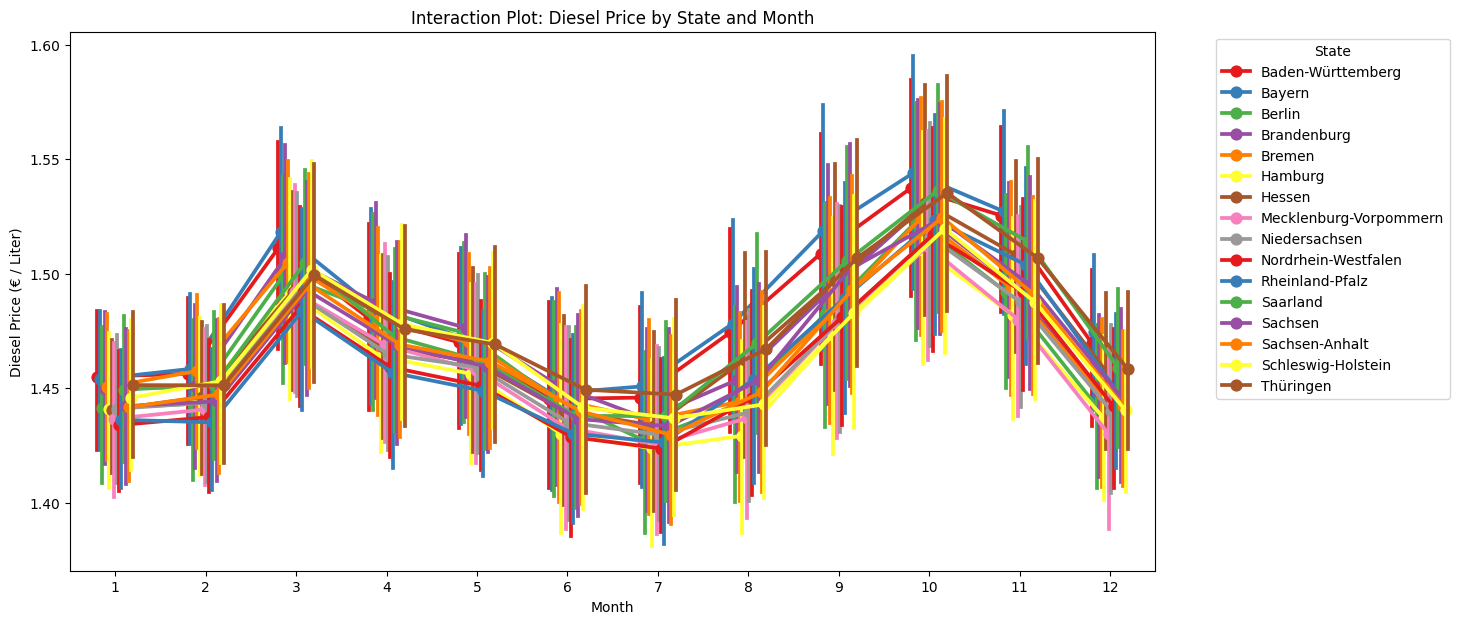

C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\2546278628.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y=product, data=data, palette='Set3')


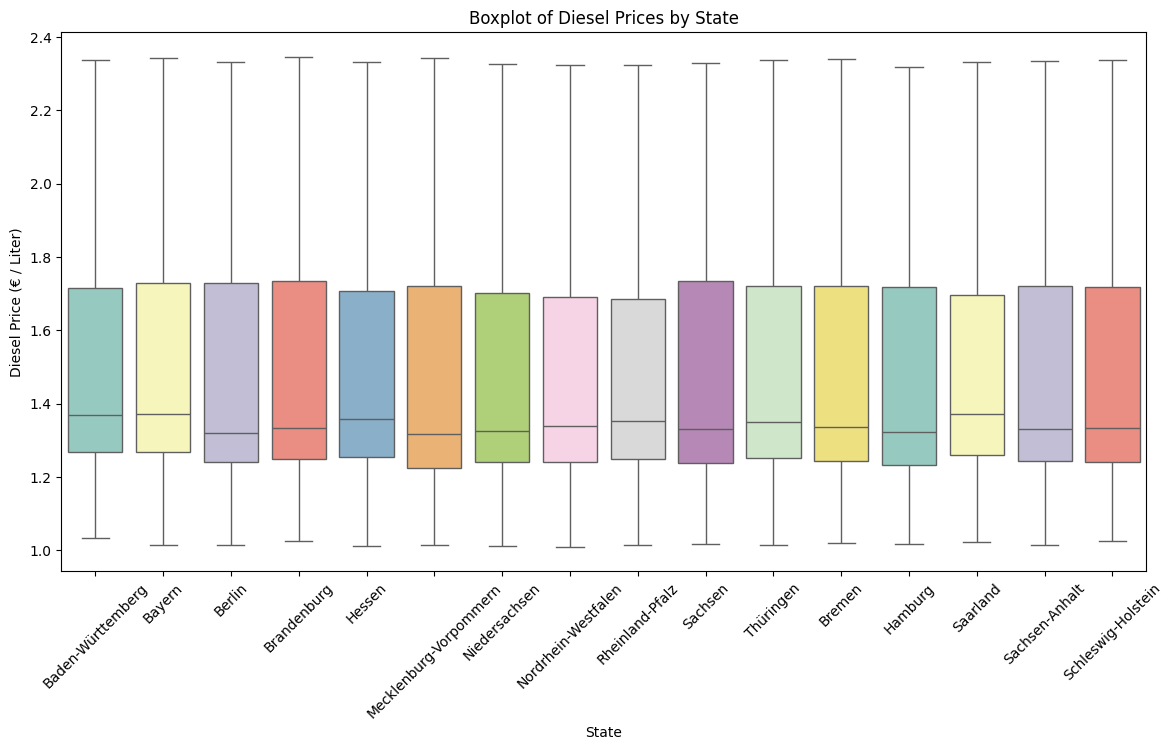

ANOVA results for E5:
                         sum_sq       df          F         PR(>F)
C(State)              8.474033     15.0   9.749076   1.510366e-23
C(month)             35.854890     11.0  56.249708  1.489696e-124
C(State):C(month)     1.137883    165.0   0.119009   1.000000e+00
Residual           2230.460992  38491.0        NaN            NaN


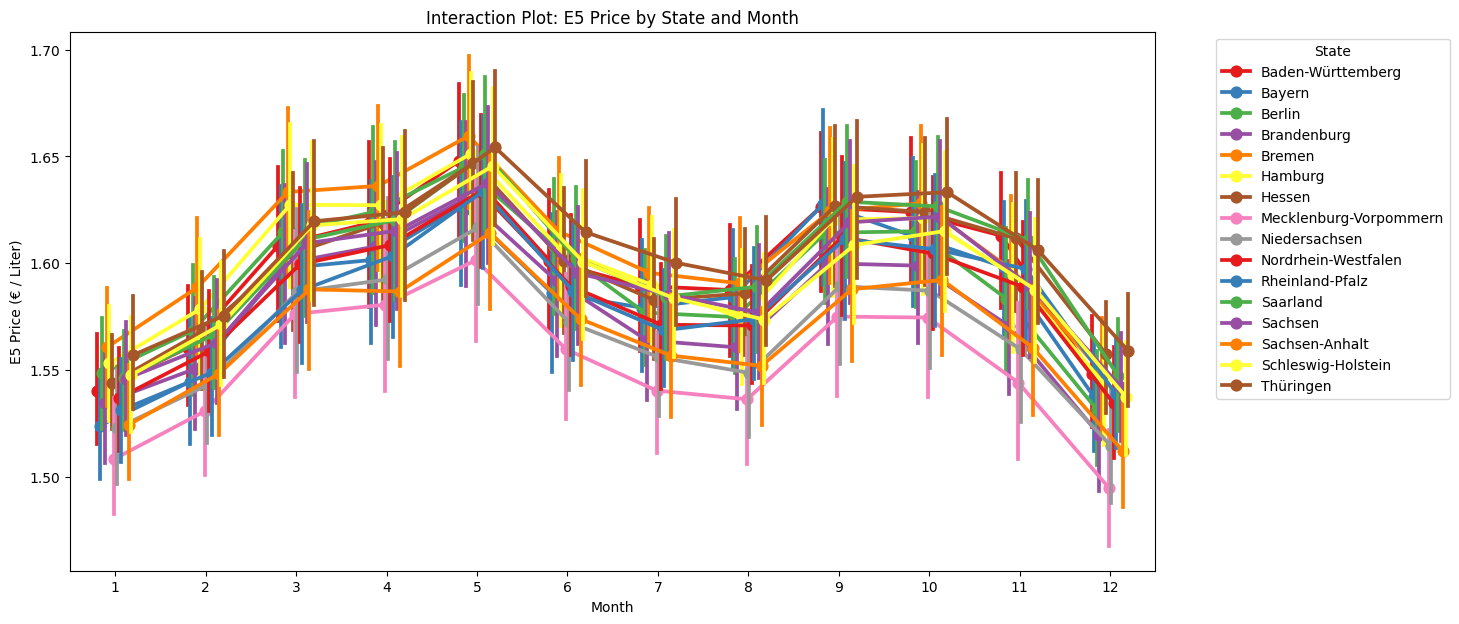

C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\2546278628.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y=product, data=data, palette='Set3')


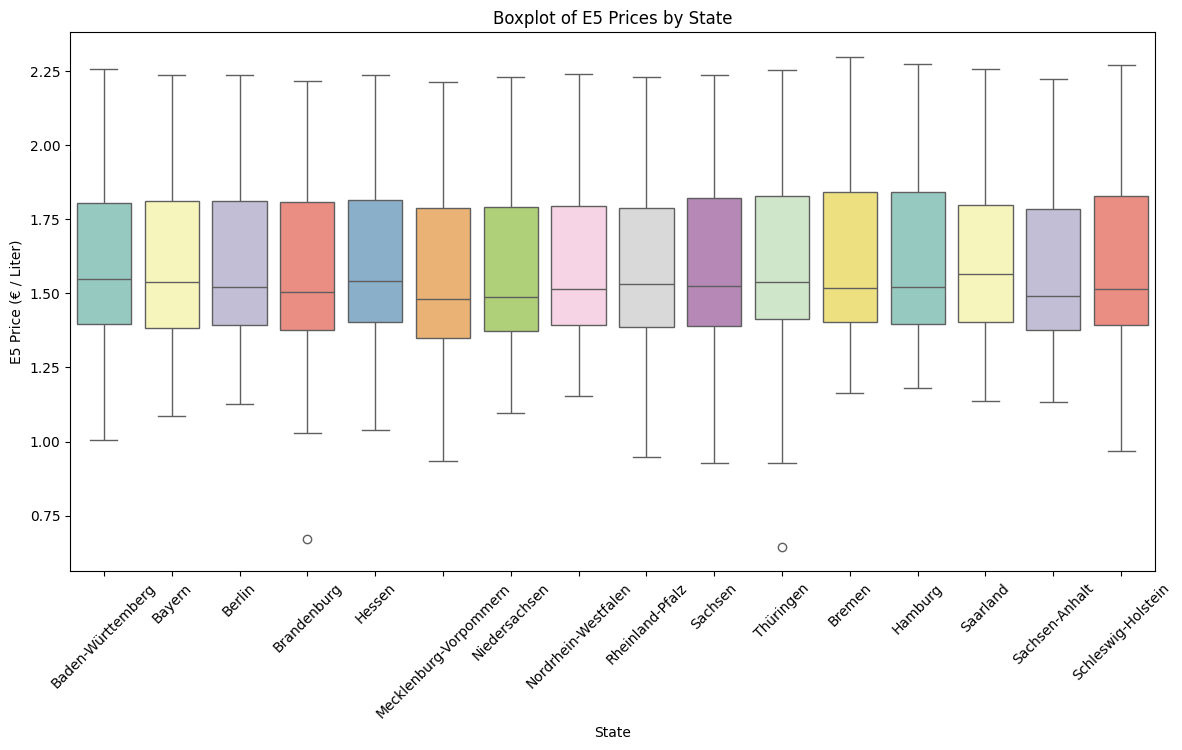

ANOVA results for E10:
                         sum_sq       df          F         PR(>F)
C(State)             30.554290     15.0  40.510726  8.119191e-119
C(month)             33.193060     11.0  60.012772  2.854573e-133
C(State):C(month)     1.141985    165.0   0.137647   1.000000e+00
Residual           1935.397226  38491.0        NaN            NaN


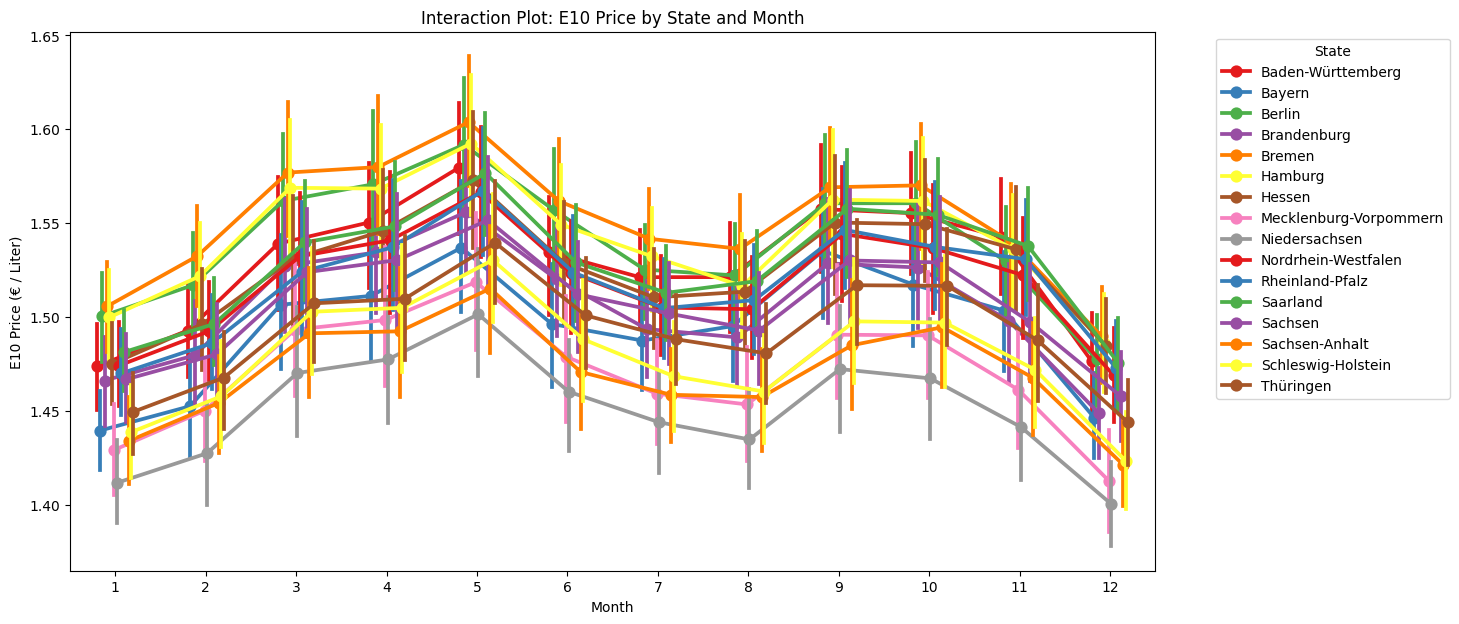

C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\2546278628.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y=product, data=data, palette='Set3')


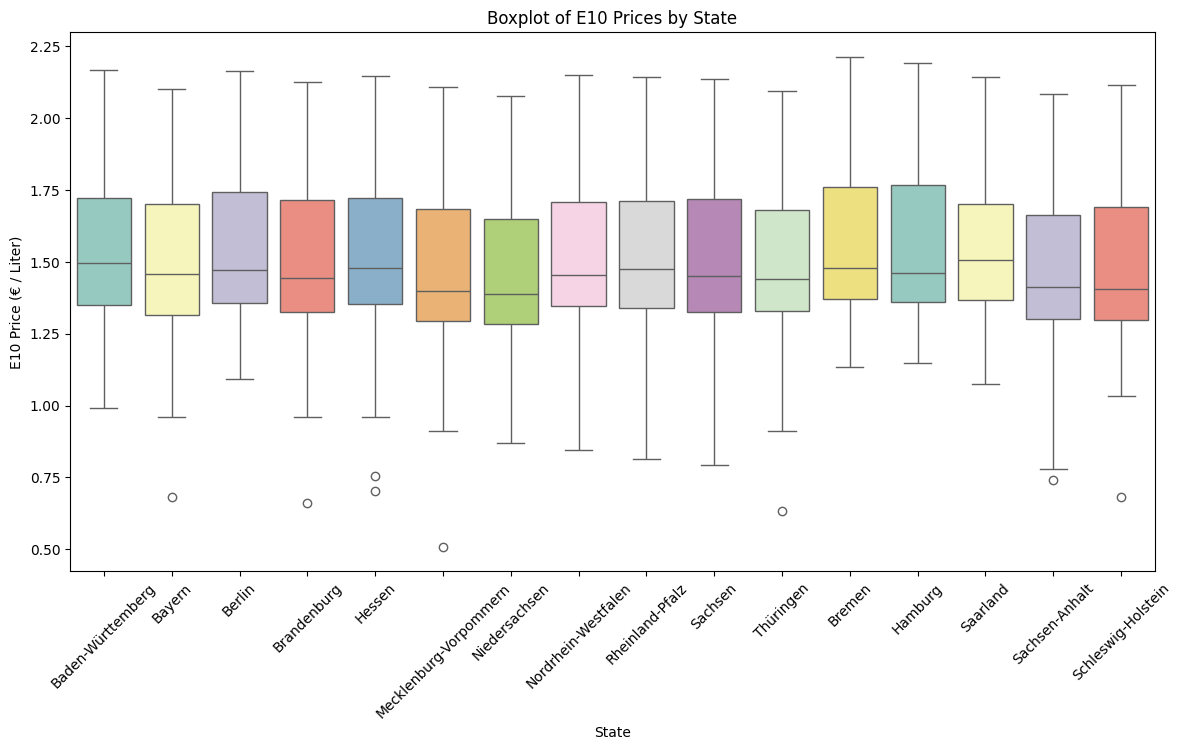

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to your CSV file
file_path = r'~Local\Base_States_v.csv'

# Read the CSV file into a pandas DataFrame
data_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
data_df['date'] = pd.to_datetime(data_df['date'])

# Extract month and year from the date
data_df['month'] = data_df['date'].dt.month
data_df['year'] = data_df['date'].dt.year

# Ensure there are no missing or incorrect state values
data_df['State'] = data_df['State'].str.strip()  # Remove any leading/trailing spaces
data_df = data_df.dropna(subset=['State'])  # Drop rows where 'State' is NaN

# Function to perform and plot two-way ANOVA
def plot_anova_interaction(data, product):
    # Perform ANOVA
    model = ols(f'{product} ~ C(State) + C(month) + C(State):C(month)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA results for {product.capitalize()}:\n", anova_table)
    
    # Interaction plot
    plt.figure(figsize=(14, 7))
    sns.pointplot(x='month', y=product, hue='State', data=data, palette='Set1', dodge=True)
    plt.title(f'Interaction Plot: {product.capitalize()} Price by State and Month')
    plt.xlabel('Month')
    plt.ylabel(f'{product.capitalize()} Price (€ / Liter)')
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Boxplot of prices by state
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='State', y=product, data=data, palette='Set3')
    plt.title(f'Boxplot of {product.capitalize()} Prices by State')
    plt.xlabel('State')
    plt.ylabel(f'{product.capitalize()} Price (€ / Liter)')
    plt.xticks(rotation=45)
    plt.show()

# Plot ANOVA and interaction for Diesel
plot_anova_interaction(data_df, 'diesel')

# Plot ANOVA and interaction for E5
plot_anova_interaction(data_df, 'e5')

# Plot ANOVA and interaction for E10
plot_anova_interaction(data_df, 'e10')



C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\965413455.py:8: DtypeWarning: Columns (18,29,30,37,38,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)


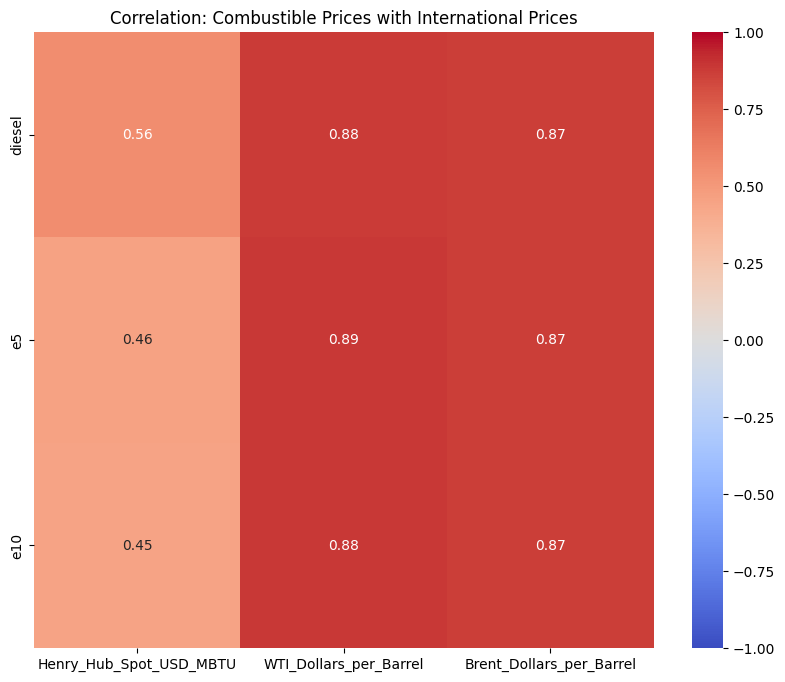

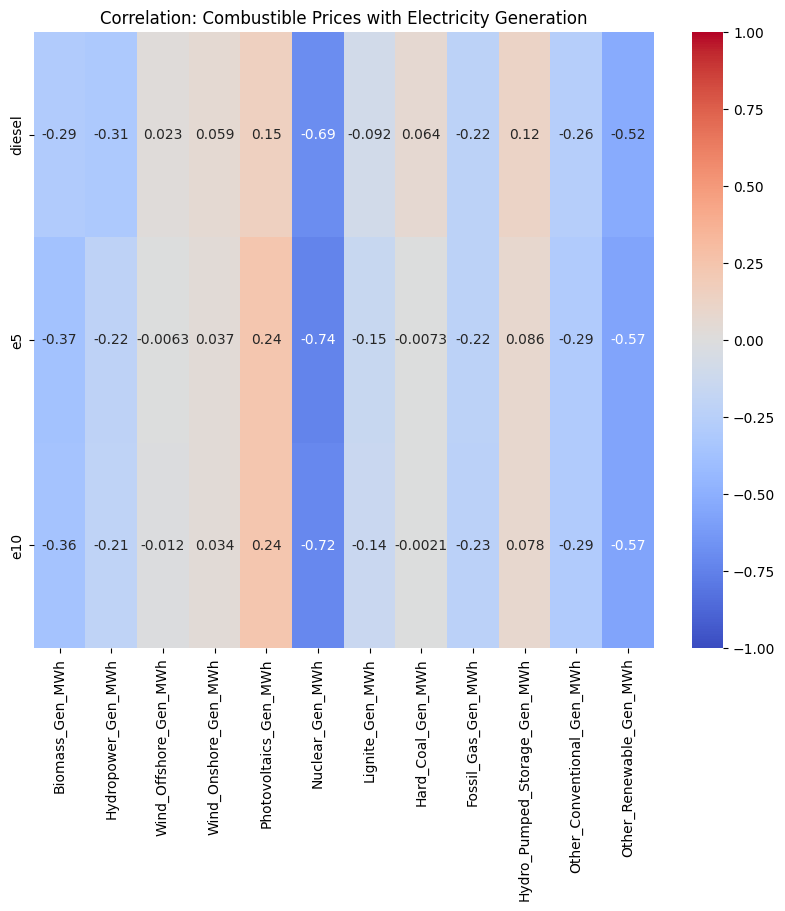

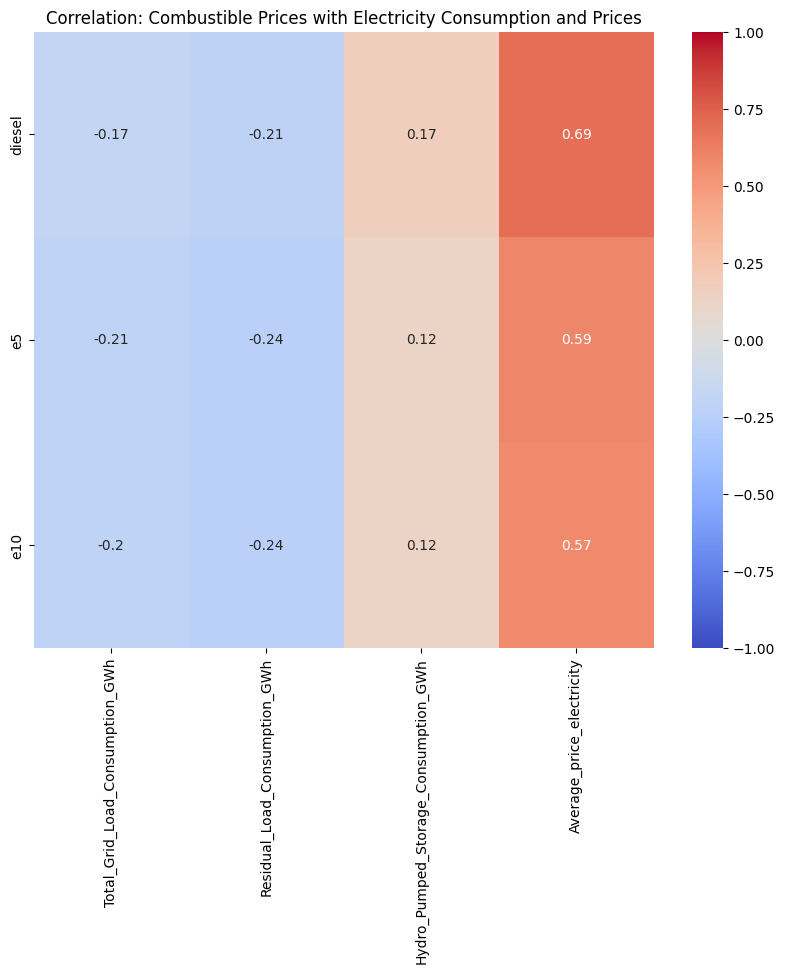

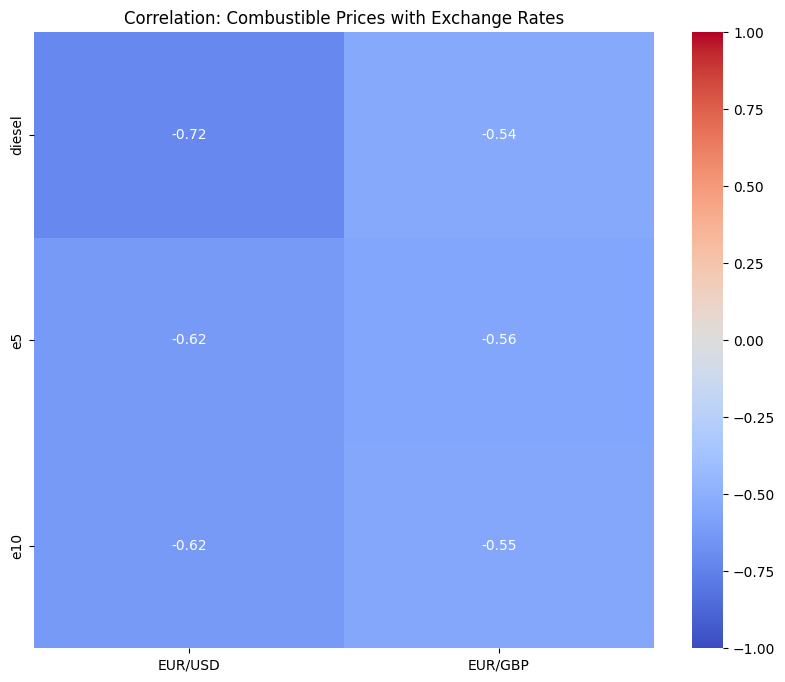

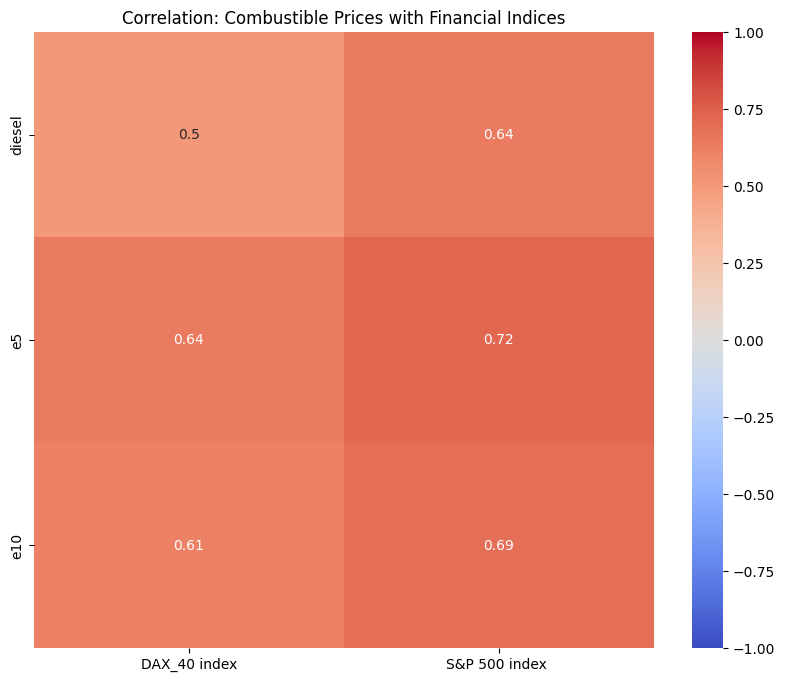

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = r'~Local\Base_States_v.csv'
data_df = pd.read_csv(file_path)

# Replace non-numeric values (like '-') with NaN
data_df.replace('-', np.nan, inplace=True)

# Convert all columns to numeric, forcing errors to NaN
data_df = data_df.apply(pd.to_numeric, errors='coerce')

# 1. Germany Combustible Prices
combustible_prices = data_df[['diesel', 'e5', 'e10']]

# 2. International Prices
international_prices = data_df[['Henry_Hub_Spot_USD_MBTU', 'WTI_Dollars_per_Barrel', 'Brent_Dollars_per_Barrel']]

# 3. Electricity Generation
electricity_generation = data_df[['Biomass_Gen_MWh', 'Hydropower_Gen_MWh', 'Wind_Offshore_Gen_MWh',
                                  'Wind_Onshore_Gen_MWh', 'Photovoltaics_Gen_MWh', 'Nuclear_Gen_MWh', 
                                  'Lignite_Gen_MWh', 'Hard_Coal_Gen_MWh', 'Fossil_Gas_Gen_MWh',
                                  'Hydro_Pumped_Storage_Gen_MWh', 'Other_Conventional_Gen_MWh', 
                                  'Other_Renewable_Gen_MWh']]

# 4. Electricity Consumption and Prices
electricity_consumption_and_prices = data_df[['Total_Grid_Load_Consumption_GWh', 
                                              'Residual_Load_Consumption_GWh', 
                                              'Hydro_Pumped_Storage_Consumption_GWh',
                                              'Average_price_electricity']]

# 5. Exchange Rates
exchange_rates = data_df[['EUR/USD', 'EUR/GBP']]

# 6. Financial Indices
financial_indices = data_df[['DAX_40 index', 'S&P 500 index ']]

# Function to plot correlation heatmap only between combustible prices and the specific category
def plot_correlation_with_combustible(combustibles, category_data, title):
    combined_data = pd.concat([combustibles, category_data], axis=1)
    corr_matrix = combined_data.corr().loc[combustibles.columns, category_data.columns]
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Plot correlation heatmaps
plot_correlation_with_combustible(combustible_prices, international_prices, 'Correlation: Combustible Prices with International Prices')
plot_correlation_with_combustible(combustible_prices, electricity_generation, 'Correlation: Combustible Prices with Electricity Generation')
plot_correlation_with_combustible(combustible_prices, electricity_consumption_and_prices, 'Correlation: Combustible Prices with Electricity Consumption and Prices')
plot_correlation_with_combustible(combustible_prices, exchange_rates, 'Correlation: Combustible Prices with Exchange Rates')
plot_correlation_with_combustible(combustible_prices, financial_indices, 'Correlation: Combustible Prices with Financial Indices')




C:\Users\mauro\AppData\Local\Temp\ipykernel_26304\2647436938.py:8: DtypeWarning: Columns (18,29,30,37,38,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)


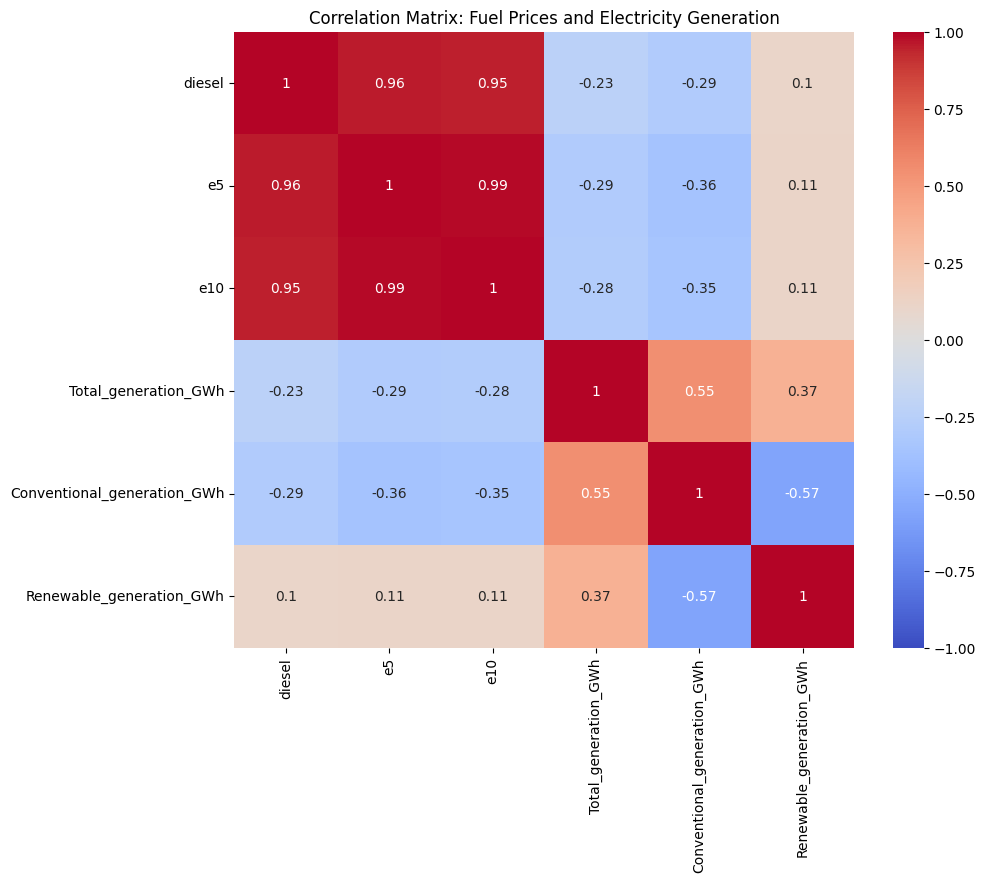

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = r'~Local\Base_States_v.csv'
data_df = pd.read_csv(file_path)

# Replace non-numeric values (like '-') with NaN
data_df.replace('-', np.nan, inplace=True)

# Convert all columns to numeric, forcing errors to NaN
data_df = data_df.apply(pd.to_numeric, errors='coerce')

# Define the variables of interest
combustible_prices = data_df[['diesel', 'e5', 'e10']]
generation_variables = data_df[['Total_generation_GWh', 
                                'Conventional_generation_GWh', 
                                'Renewable_generation_GWh']]

# Combine the data for correlation analysis
combined_data = pd.concat([combustible_prices, generation_variables], axis=1)

# Calculate the correlation matrix
corr_matrix = combined_data.corr()

# Display the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Fuel Prices and Electricity Generation')
plt.show()


##### ***Correlation analysis reveals intricate relationships between fuel prices and various economic indicators.***

International oil benchmarks (WTI and Brent) exert a dominant influence on German fuel prices, with correlation coefficients approaching 0.9. Electricity generation, particularly from conventional sources, inversely correlates with fuel prices, suggesting potential substitution effects.

A moderate to strong positive correlation exists between electricity prices and fuel prices, indicating interconnectedness within the energy market. Additionally, a weakening Euro relative to the Dollar tends to decrease fuel prices due to cheaper oil imports.

The analysis reveals several key factors significantly influencing fuel prices in Germany. International oil prices, as measured by WTI and Brent crude oil, exhibit exceptionally strong positive correlations with fuel prices (0.88-0.89), underscoring their dominant role in determining domestic fuel costs. Exchange rates, specifically the EUR/USD, demonstrate a substantial negative correlation with diesel prices (-0.72), indicating that a stronger Euro leads to lower fuel prices due to cheaper oil imports. Additionally, a positive correlation exists between average electricity prices and diesel prices (0.69), suggesting a linkage between the broader energy market and fuel prices.

Financial indices (DAX 40 and S&P 500) exhibit a moderate to strong positive correlation with fuel prices, implying a potential link to broader economic conditions. While total and conventional electricity generation correlate positively, renewable generation shows a weak positive relationship with fuel prices, indicating distinct dynamics.

While the correlation between financial indices, such as the S&P 500, and fuel prices is moderate to strong (0.69-0.72), particularly for E5 and E10, their influence appears less pronounced compared to oil prices and exchange rates. Nonetheless, these indices provide insights into how broader economic conditions can indirectly affect fuel costs

The analysis reveals that the most influential factors on fuel prices in Germany are global oil prices, exchange rates, and electricity prices. Specifically, the WTI and Brent crude oil prices, the EUR/USD exchange rate, and the average price of electricity exhibit the strongest correlations with fuel prices. These findings indicate that fluctuations in international oil markets and currency exchange rates are primary drivers of fuel price changes in Germany. Additionally, the correlation with electricity prices suggests that the dynamics of the broader energy market also play a significant role. Financial indices, such as the S&P 500, further highlight the impact of global economic conditions on fuel prices. These key variables should be the focus of predictive models aiming to forecast fuel price fluctuations in Germany.

# ***Modelling for a Dream***

Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit # Import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
import matplotlib.pyplot as plt



Load and Preprocess Data

In [ ]:
# Load the dataset
file_path = r'~Local\Base_States_v.csv'
data_df = pd.read_csv(file_path)

# Filter for Berlin state
berlin_data = data_df[data_df['State'] == 'Berlin']

# Convert date to datetime format
berlin_data['date'] = pd.to_datetime(berlin_data['date'])
berlin_data.set_index('date', inplace=True)

# Select relevant columns
columns = ['diesel', 'e5', 'e10', 'Henry_Hub_Spot_USD_MBTU', 'WTI_Dollars_per_Barrel', 
           'Brent_Dollars_per_Barrel', 'EUR/USD', 'EUR/GBP', 'DAX_40 index', 
           'S&P 500 index ', 'Total_generation_GWh', 'Conventional_generation_GWh', 
           'Renewable_generation_GWh', 'Average_price_electricity', 
           'Total_Grid_Load_Consumption_GWh']

berlin_data = berlin_data[columns]


C:\Users\mauro\AppData\Local\Temp\ipykernel_24408\52473855.py:3: DtypeWarning: Columns (18,29,30,37,38,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path)
C:\Users\mauro\AppData\Local\Temp\ipykernel_24408\52473855.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  berlin_data['date'] = pd.to_datetime(berlin_data['date'])
C:\Users\mauro\AppData\Local\Temp\ipykernel_24408\52473855.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berlin_data['date'] = pd.to_datetime(berlin_data['date'])


### **Rolling cross-validation to find the best (p, d, q) parameters for ARIMA**

In [4]:
# Extract diesel prices for ARIMA model
diesel_prices = berlin_data['diesel']

# Rolling cross-validation to find the best (p, d, q) parameters for ARIMA
tscv = TimeSeriesSplit(n_splits=5)
best_order = None
best_mse = float("inf")

# Hyperparameter tuning for ARIMA model
for p in range(1, 6):
    for d in range(1, 3):
        for q in range(1, 6):
            mse_scores = []
            for train_index, test_index in tscv.split(diesel_prices):
                train, test = diesel_prices.iloc[train_index], diesel_prices.iloc[test_index]
                try:
                    model = ARIMA(train, order=(p, d, q))
                    model_fit = model.fit()
                    predictions = model_fit.forecast(steps=len(test))
                    mse = mean_squared_error(test, predictions)
                    mse_scores.append(mse)
                except:
                    continue
            avg_mse = np.mean(mse_scores)
            if avg_mse < best_mse:
                best_mse = avg_mse
                best_order = (p, d, q)

print(f"Best ARIMA order: {best_order} with MSE: {best_mse}")


c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No suppor

Best ARIMA order: (4, 1, 2) with MSE: 0.026759021043792092


c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1. ARIMA Model

c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 diesel   No. Observations:                 2409
Model:                 ARIMA(5, 1, 0)   Log Likelihood                7155.462
Date:                Wed, 21 Aug 2024   AIC                         -14298.924
Time:                        08:04:06   BIC                         -14264.205
Sample:                             0   HQIC                        -14286.295
                               - 2409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0838      0.009      9.447      0.000       0.066       0.101
ar.L2         -0.0046      0.016     -0.279      0.781      -0.037       0.028
ar.L3         -0.0155      0.019     -0.813      0.4

c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


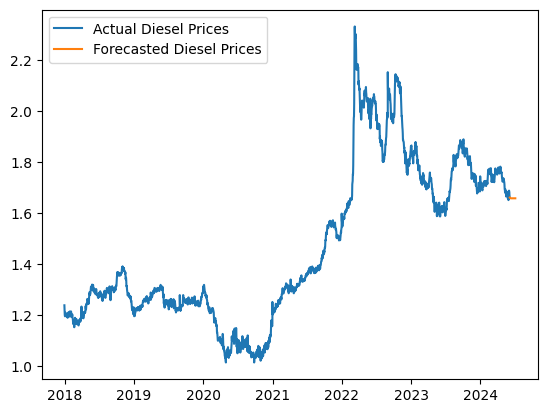

In [6]:
# ARIMA Model for Diesel prices
arima_model = ARIMA(berlin_data['diesel'], order=(5,1,0))
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Forecasting
arima_forecast = arima_fit.forecast(steps=30)

# Prepare data for export to Excel
forecast_dates = pd.date_range(start=berlin_data.index[-1], periods=30, freq='D')
forecast_df = pd.DataFrame(data={'Forecasted Diesel Prices': arima_forecast}, index=forecast_dates)

# Export the forecast data to an Excel file at the specified path
output_path = r"C:\Users\mauro\Documentos\Universidad\6. Thesis\results_excel\ARIMA_Diesel_Price_Forecast.xlsx"
forecast_df.to_excel(output_path)

# Plotting the actual and forecasted data
plt.plot(berlin_data.index, berlin_data['diesel'], label='Actual Diesel Prices')
plt.plot(forecast_dates, arima_forecast, label='Forecasted Diesel Prices')
plt.legend()
plt.show()

Random Forest MSE: 0.00029292760067303335, RMSE: 0.01711512783104565, MAE: 0.012961348478490682
XGBoost MSE: 0.0003086944535566624, RMSE: 0.017569702716798096, MAE: 0.013059276923816065


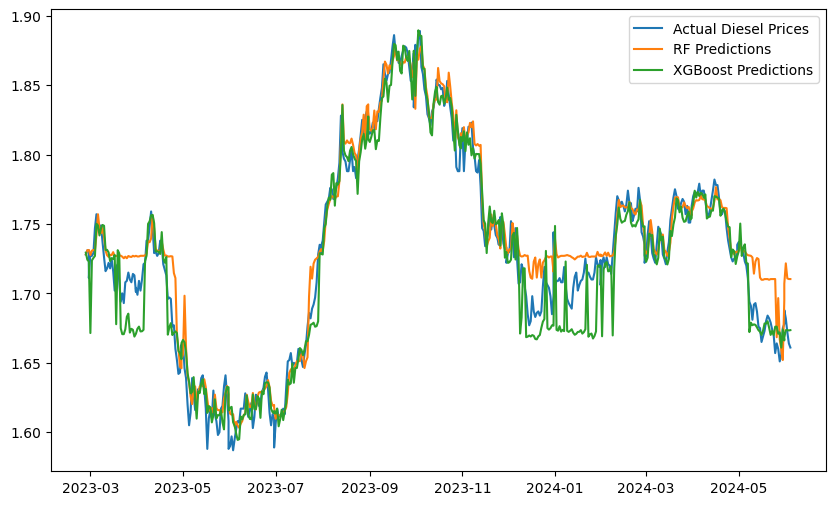

In [ ]:

# Feature Scaling (excluding the target variable 'diesel')
scaler = MinMaxScaler()
y_diesel = berlin_data['diesel']
berlin_data_temp = berlin_data.drop('diesel', axis=1)  # Drop the target variable
berlin_data_scaled = pd.DataFrame(scaler.fit_transform(berlin_data_temp), columns=berlin_data_temp.columns, index=berlin_data_temp.index)

# Add back the unscaled 'diesel' column to the scaled features
berlin_data_scaled['diesel'] = y_diesel

# Create lag features for diesel price
for lag in range(1, 8):  # Adding 7 lagged features
    berlin_data_scaled[f'diesel_lag_{lag}'] = y_diesel.shift(lag)

# Drop missing values caused by lagging
berlin_data_scaled.dropna(inplace=True)

# Prepare data for ML models
X = berlin_data_scaled.drop(['diesel', 'e5', 'e10'], axis=1)  # Use scaled features only
y_diesel = berlin_data_scaled['diesel']  # Use the original unscaled target variable

# Train-test split
X_train, X_test, y_train_diesel, y_test_diesel = train_test_split(X, y_diesel, test_size=0.2, shuffle=False)

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Random Forest Model with Grid Search and Validation
rf_model = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=tscv, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train_diesel)

# Best Random Forest model
rf_best_model = rf_grid_search.best_estimator_

# Predictions with Random Forest
rf_predictions = rf_best_model.predict(X_test)

# XGBoost Model with Grid Search and Validation
xgb_model = XGBRegressor()
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=tscv, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train_diesel)

# Best XGBoost model
xgb_best_model = xgb_grid_search.best_estimator_

# Predictions with XGBoost
xgb_predictions = xgb_best_model.predict(X_test)

# Calculate metrics for Random Forest
rf_mse = mean_squared_error(y_test_diesel, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test_diesel, rf_predictions)

# Calculate metrics for XGBoost
xgb_mse = mean_squared_error(y_test_diesel, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test_diesel, xgb_predictions)

# Print metrics
print(f"Random Forest MSE: {rf_mse}, RMSE: {rf_rmse}, MAE: {rf_mae}")
print(f"XGBoost MSE: {xgb_mse}, RMSE: {xgb_rmse}, MAE: {xgb_mae}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(berlin_data.index[-len(y_test_diesel):], y_test_diesel, label='Actual Diesel Prices')
plt.plot(berlin_data.index[-len(rf_predictions):], rf_predictions, label='RF Predictions')
plt.plot(berlin_data.index[-len(xgb_predictions):], xgb_predictions, label='XGBoost Predictions')
plt.legend()
plt.show()

c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 diesel   No. Observations:                 2409
Model:                 ARIMA(5, 1, 0)   Log Likelihood                7155.462
Date:                Tue, 13 Aug 2024   AIC                         -14298.924
Time:                        11:57:03   BIC                         -14264.205
Sample:                             0   HQIC                        -14286.295
                               - 2409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0838      0.009      9.447      0.000       0.066       0.101
ar.L2         -0.0046      0.016     -0.279      0.781      -0.037       0.028
ar.L3         -0.0155      0.019     -0.813      0.4

c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


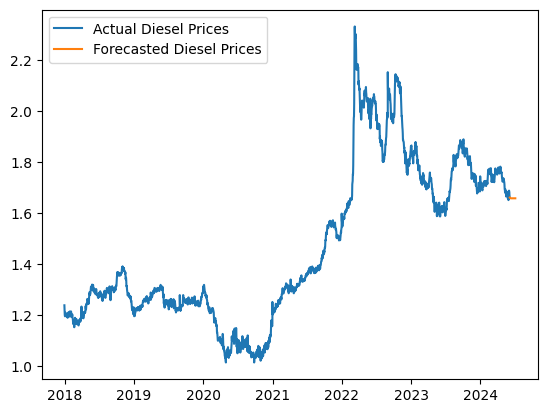

In [65]:
# ARIMA Model for Diesel prices
arima_model = ARIMA(berlin_data['diesel'], order=(5,1,0))
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Forecasting
arima_forecast = arima_fit.forecast(steps=30)
plt.plot(berlin_data.index, berlin_data['diesel'], label='Actual Diesel Prices')
plt.plot(pd.date_range(start=berlin_data.index[-1], periods=30, freq='D'), arima_forecast, label='Forecasted Diesel Prices')
plt.legend()
plt.show()


2. Var Model

c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date in

Average validation MSE: 0.02041752573657471
Optimal lag length based on cross-validation: 8


c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 13, Aug, 2024
Time:                     12:53:14
--------------------------------------------------------------------
No. of Equations:         14.0000    BIC:                   -21.6965
Nobs:                     2401.00    HQIC:                  -24.1209
Log likelihood:          -15492.7    FPE:                8.37047e-12
AIC:                     -25.5073    Det(Omega_mle):     4.39673e-12
--------------------------------------------------------------------
Results for equation diesel
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                      0.029769         0.021012            1.417           0.157
L1.diesel                                  1.023774         0.029365         

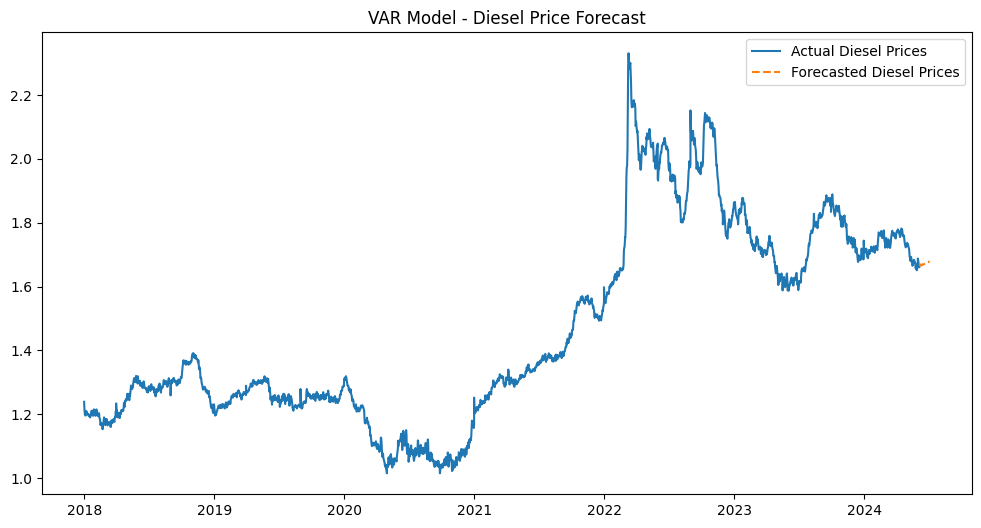

In [98]:
# Define a function to perform cross-validation on the VAR model
def cross_validate_var(data, maxlags, n_folds=5):
    fold_size = len(data) // n_folds
    errors = []

    for i in range(n_folds):
        # Split the data into training and validation sets
        train_end = (i + 1) * fold_size
        train_data = data[:train_end]
        val_data = data[train_end:train_end + fold_size]

        # Fit the VAR model on the training data
        model = VAR(train_data)
        results = model.select_order(maxlags=maxlags)
        optimal_lag = results.aic  # You can also use bic, hqic, or fpe

        # Fit the model with the selected lag
        var_fit = model.fit(optimal_lag)

        # Forecast on the validation set
        forecast = var_fit.forecast(var_fit.model.endog[-optimal_lag:], steps=len(val_data))
        forecast_df = pd.DataFrame(forecast, index=val_data.index, columns=data.columns)

        # Calculate the error for this fold
        mse = mean_squared_error(val_data['diesel'], forecast_df['diesel'])
        errors.append(mse)

    # Return the average validation error across folds
    avg_error = np.mean(errors)
    return avg_error, optimal_lag

# Cross-Validation for Lag Selection
# Play with more lags 5, 7, 10, 15, 20
maxlags = 15
avg_validation_error, optimal_lag = cross_validate_var(berlin_data, maxlags=maxlags, n_folds=5)
print(f"Average validation MSE: {avg_validation_error}")
print(f"Optimal lag length based on cross-validation: {optimal_lag}")

# Fit the VAR model with the selected lag
model = VAR(berlin_data)
var_fit = model.fit(optimal_lag)
print(var_fit.summary())

# Check for stability
if var_fit.is_stable():
    print("The VAR model is stable.")
else:
    print("The VAR model is not stable. Consider revising the model.")

# Forecasting
var_forecast = var_fit.forecast(var_fit.model.endog[-optimal_lag:], steps=30)

# Convert forecast to DataFrame
var_forecast_df = pd.DataFrame(var_forecast, index=pd.date_range(start=berlin_data.index[-1], periods=30, freq='D'), columns=berlin_data.columns)

# Align the actual data with the forecasted data for comparison (for demonstration)
actual_data_to_compare = berlin_data['diesel'].iloc[-optimal_lag:]
mse = mean_squared_error(actual_data_to_compare, var_forecast_df['diesel'][:len(actual_data_to_compare)])
rmse = np.sqrt(mse)
print(f"VAR Model Forecast RMSE: {rmse}")

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(berlin_data.index, berlin_data['diesel'], label='Actual Diesel Prices')
plt.plot(var_forecast_df.index, var_forecast_df['diesel'], label='Forecasted Diesel Prices', linestyle='--')
plt.legend()
plt.title('VAR Model - Diesel Price Forecast')
plt.show()


In [113]:
berlin_data.describe

<bound method NDFrame.describe of             diesel     e5    e10  Henry_Hub_Spot_USD_MBTU  \
date                                                        
2017-12-31   1.239  1.419  1.399                     3.69   
2018-01-01   1.214  1.383  1.359                     3.69   
2018-01-02   1.201  1.362  1.338                     6.24   
2018-01-03   1.196  1.362  1.338                     6.24   
2018-01-04   1.196  1.359  1.335                     4.65   
...            ...    ...    ...                      ...   
2024-05-31   1.688  1.808  1.749                     1.78   
2024-06-01   1.682  1.809  1.743                     1.78   
2024-06-02   1.672  1.805  1.738                     1.78   
2024-06-03   1.664  1.800  1.735                     1.78   
2024-06-04   1.661  1.791  1.724                     1.78   

            WTI_Dollars_per_Barrel  Brent_Dollars_per_Barrel  EUR/USD  \
date                                                                    
2017-12-31                

3. Random Forest and XGBoost

Random Forest MSE: 0.00029292760067303335, RMSE: 0.01711512783104565, MAE: 0.012961348478490682
XGBoost MSE: 0.0003086944535566624, RMSE: 0.017569702716798096, MAE: 0.013059276923816065


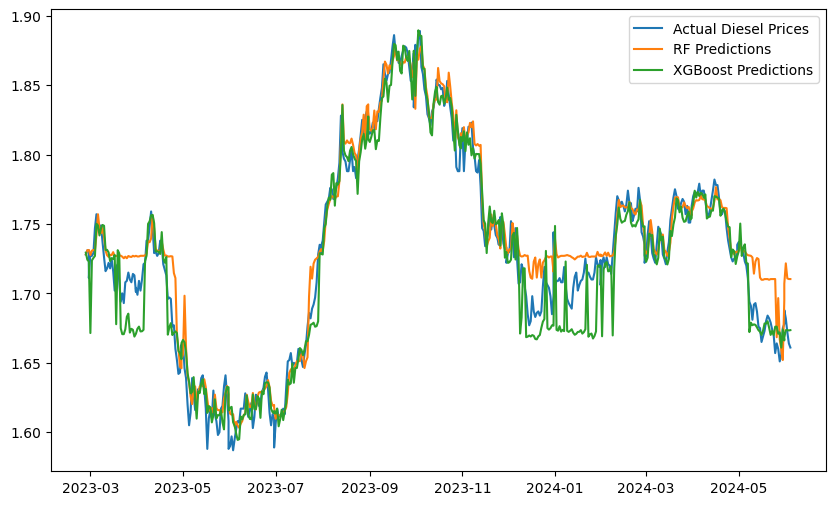

In [119]:

# Feature Scaling (excluding the target variable 'diesel')
scaler = MinMaxScaler()
y_diesel = berlin_data['diesel']
berlin_data_temp = berlin_data.drop('diesel', axis=1)  # Drop the target variable
berlin_data_scaled = pd.DataFrame(scaler.fit_transform(berlin_data_temp), columns=berlin_data_temp.columns, index=berlin_data_temp.index)

# Add back the unscaled 'diesel' column to the scaled features
berlin_data_scaled['diesel'] = y_diesel

# Create lag features for diesel price
for lag in range(1, 8):  # Adding 7 lagged features
    berlin_data_scaled[f'diesel_lag_{lag}'] = y_diesel.shift(lag)

# Drop missing values caused by lagging
berlin_data_scaled.dropna(inplace=True)

# Prepare data for ML models
X = berlin_data_scaled.drop(['diesel', 'e5', 'e10'], axis=1)  # Use scaled features only
y_diesel = berlin_data_scaled['diesel']  # Use the original unscaled target variable

# Train-test split
X_train, X_test, y_train_diesel, y_test_diesel = train_test_split(X, y_diesel, test_size=0.2, shuffle=False)

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Random Forest Model with Grid Search and Validation
rf_model = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=tscv, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train_diesel)

# Best Random Forest model
rf_best_model = rf_grid_search.best_estimator_

# Predictions with Random Forest
rf_predictions = rf_best_model.predict(X_test)

# XGBoost Model with Grid Search and Validation
xgb_model = XGBRegressor()
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=tscv, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train_diesel)

# Best XGBoost model
xgb_best_model = xgb_grid_search.best_estimator_

# Predictions with XGBoost
xgb_predictions = xgb_best_model.predict(X_test)

# Calculate metrics for Random Forest
rf_mse = mean_squared_error(y_test_diesel, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test_diesel, rf_predictions)

# Calculate metrics for XGBoost
xgb_mse = mean_squared_error(y_test_diesel, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test_diesel, xgb_predictions)

# Print metrics
print(f"Random Forest MSE: {rf_mse}, RMSE: {rf_rmse}, MAE: {rf_mae}")
print(f"XGBoost MSE: {xgb_mse}, RMSE: {xgb_rmse}, MAE: {xgb_mae}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(berlin_data.index[-len(y_test_diesel):], y_test_diesel, label='Actual Diesel Prices')
plt.plot(berlin_data.index[-len(rf_predictions):], rf_predictions, label='RF Predictions')
plt.plot(berlin_data.index[-len(xgb_predictions):], xgb_predictions, label='XGBoost Predictions')
plt.legend()
plt.show()

In [120]:
# Print a sample of actual vs. predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test_diesel.values[:10],  # First 10 for brevity
    'RF Prediction': rf_predictions[:10],
    'XGB Prediction': xgb_predictions[:10]
})

print(comparison_df)


   Actual  RF Prediction  XGB Prediction
0   1.728       1.728073        1.729312
1   1.731       1.731081        1.724246
2   1.731       1.731223        1.722968
3   1.711       1.731223        1.722968
4   1.729       1.727612        1.671437
5   1.727       1.730785        1.723750
6   1.729       1.731223        1.725517
7   1.747       1.731083        1.726974
8   1.757       1.742081        1.750108
9   1.747       1.756992        1.748887


In [112]:
print(berlin_data_scaled)

                  e5       e10  Henry_Hub_Spot_USD_MBTU  \
date                                                      
2018-01-07  0.220920  0.238361                 0.150376   
2018-01-08  0.204689  0.221601                 0.072534   
2018-01-09  0.203787  0.220670                 0.074303   
2018-01-10  0.211001  0.228119                 0.084476   
2018-01-11  0.213706  0.230912                 0.084476   
...              ...       ...                      ...   
2024-05-31  0.614067  0.611732                 0.023441   
2024-06-01  0.614968  0.606145                 0.023441   
2024-06-02  0.611362  0.601490                 0.023441   
2024-06-03  0.606853  0.598696                 0.023441   
2024-06-04  0.598738  0.588454                 0.023441   

            WTI_Dollars_per_Barrel  Brent_Dollars_per_Barrel   EUR/USD  \
date                                                                     
2018-01-07                0.613062                  0.474690  0.827586   
2018-01-08

4. LSTM and GRU

Epoch 1/50


c:\Users\mauro\Documentos\Universidad\6. Thesis\Data\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 - 7s - 136ms/step - loss: 0.0041 - val_loss: 0.0483
Epoch 2/50
48/48 - 1s - 24ms/step - loss: 5.5637e-04 - val_loss: 0.0252
Epoch 3/50
48/48 - 1s - 25ms/step - loss: 3.9008e-04 - val_loss: 0.0237
Epoch 4/50
48/48 - 1s - 24ms/step - loss: 3.4954e-04 - val_loss: 0.0149
Epoch 5/50
48/48 - 1s - 26ms/step - loss: 3.2856e-04 - val_loss: 0.0202
Epoch 6/50
48/48 - 1s - 25ms/step - loss: 2.5886e-04 - val_loss: 0.0170
Epoch 7/50
48/48 - 1s - 27ms/step - loss: 2.7694e-04 - val_loss: 0.0220
Epoch 8/50
48/48 - 1s - 28ms/step - loss: 2.2479e-04 - val_loss: 0.0186
Epoch 9/50
48/48 - 1s - 24ms/step - loss: 2.2201e-04 - val_loss: 0.0193
Epoch 10/50
48/48 - 1s - 27ms/step - loss: 2.0577e-04 - val_loss: 0.0218
Epoch 11/50
48/48 - 1s - 24ms/step - loss: 1.7934e-04 - val_loss: 0.0198
Epoch 12/50
48/48 - 1s - 27ms/step - loss: 1.7595e-04 - val_loss: 0.0166
Epoch 13/50
48/48 - 1s - 23ms/step - loss: 1.6560e-04 - val_loss: 0.0181
Epoch 14/50
48/48 - 1s - 24ms/step - loss: 1.7192e-04 - val_loss: 0.0177
E

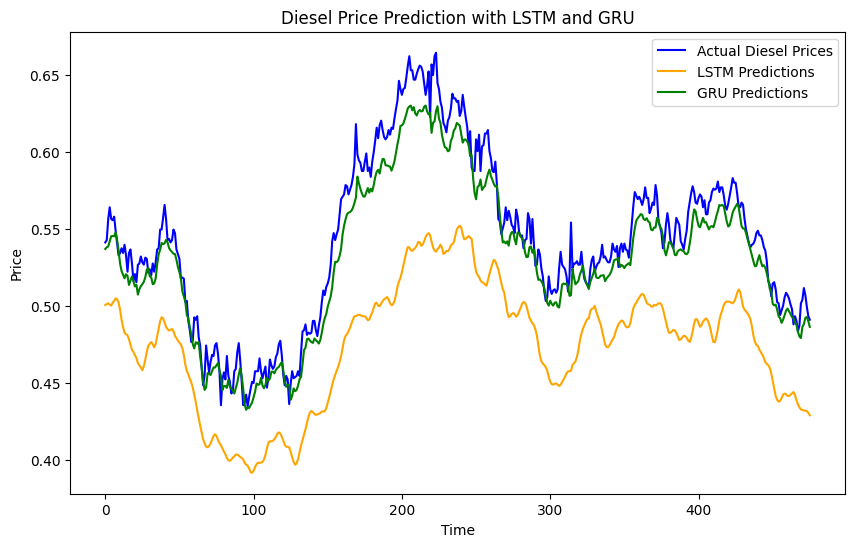

In [101]:
# Filter the columns based on what's actually present in the DataFrame
available_columns = [col for col in columns if col in berlin_data.columns]

# Select only the available columns
berlin_data = berlin_data[available_columns]

# Separate scalers for features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale the features and target separately
berlin_data_scaled = feature_scaler.fit_transform(berlin_data.drop(columns=['diesel']))
berlin_target_scaled = target_scaler.fit_transform(berlin_data[['diesel']])

# Combine scaled features and target
berlin_data_scaled = np.hstack([berlin_target_scaled, berlin_data_scaled])

# Prepare data for LSTM/GRU
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # The target is the first column (diesel prices)
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(berlin_data_scaled, seq_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LSTM Model with Validation Split
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2, validation_split=0.2)

# Forecasting with LSTM
lstm_predictions = lstm_model.predict(X_test)
# lstm_predictions = target_scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

# GRU Model with Validation Split
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(50),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2, validation_split=0.2)

# Forecasting with GRU
gru_predictions = gru_model.predict(X_test)
# gru_predictions = target_scaler.inverse_transform(gru_predictions.reshape(-1, 1))

# Inverse transform the actual test data
#y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Diesel Prices', color='blue')
plt.plot(lstm_predictions, label='LSTM Predictions', color='orange')
plt.plot(gru_predictions, label='GRU Predictions', color='green')
plt.title('Diesel Price Prediction with LSTM and GRU')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Define a custom accuracy: percentage of predictions within a certain range (e.g., ±0.1)
def custom_accuracy(actual, predicted, tolerance=0.1):
    # Ensure the lengths match by trimming the longer series
    min_len = min(len(actual), len(predicted))
    actual = actual[-min_len:]
    predicted = predicted[-min_len:]
    return np.mean(np.abs(actual - predicted) <= tolerance)

# Calculate error metrics for ARIMA
# Align lengths by taking the last n elements where n is the length of the forecast
arima_actual_values = berlin_data['diesel'][-len(arima_forecast):].values
arima_forecast_values = arima_forecast[:len(arima_actual_values)]

arima_mse = mean_squared_error(arima_actual_values, arima_forecast_values)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(arima_actual_values, arima_forecast_values)
arima_accuracy = custom_accuracy(arima_actual_values, arima_forecast_values)

# Calculate error metrics for VAR
var_actual_values = berlin_data['diesel'][-len(var_forecast_df):].values
var_forecast_values = var_forecast_df['diesel'].values[:len(var_actual_values)]

var_mse = mean_squared_error(var_actual_values, var_forecast_values)
var_rmse = np.sqrt(var_mse)
var_mae = mean_absolute_error(var_actual_values, var_forecast_values)
var_accuracy = custom_accuracy(var_actual_values, var_forecast_values)

# Align lengths for Random Forest and XGBoost predictions
min_len_rf = min(len(y_test_diesel), len(rf_predictions))
y_test_rf_aligned = y_test_diesel[-min_len_rf:]
rf_predictions_aligned = rf_predictions[-min_len_rf:]

min_len_xgb = min(len(y_test_diesel), len(xgb_predictions))
y_test_xgb_aligned = y_test_diesel[-min_len_xgb:]
xgb_predictions_aligned = xgb_predictions[-min_len_xgb:]

# Recalculate error metrics for Random Forest
rf_mse = mean_squared_error(y_test_rf_aligned, rf_predictions_aligned)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test_rf_aligned, rf_predictions_aligned)
rf_accuracy = custom_accuracy(y_test_rf_aligned, rf_predictions_aligned)

# Recalculate error metrics for XGBoost
xgb_mse = mean_squared_error(y_test_xgb_aligned, xgb_predictions_aligned)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test_xgb_aligned, xgb_predictions_aligned)
xgb_accuracy = custom_accuracy(y_test_xgb_aligned, xgb_predictions_aligned)

# Calculate error metrics for LSTM
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_accuracy = custom_accuracy(y_test, lstm_predictions)

# Calculate error metrics for GRU
gru_mse = mean_squared_error(y_test, gru_predictions)
gru_rmse = np.sqrt(gru_mse)
gru_mae = mean_absolute_error(y_test, gru_predictions)
gru_accuracy = custom_accuracy(y_test, gru_predictions)

# Create a DataFrame to compare the metrics
model_comparison = pd.DataFrame({
    'Model': ['ARIMA', 'VAR', 'Random Forest', 'XGBoost', 'LSTM', 'GRU'],
    'MSE': [arima_mse, var_mse, rf_mse, xgb_mse, lstm_mse, gru_mse],
    'RMSE': [arima_rmse, var_rmse, rf_rmse, xgb_rmse, lstm_rmse, gru_rmse],
    'MAE': [arima_mae, var_mae, rf_mae, xgb_mae, lstm_mae, gru_mae],
    'Accuracy (±0.1)': [arima_accuracy, var_accuracy, rf_accuracy, xgb_accuracy, lstm_accuracy, gru_accuracy]
})

print(model_comparison)



           Model       MSE      RMSE       MAE  Accuracy (±0.1)
0          ARIMA  0.000481  0.021925  0.018541         1.000000
1            VAR  0.000260  0.016113  0.012849         1.000000
2  Random Forest  0.000293  0.017115  0.012961         1.000000
3        XGBoost  0.000309  0.017570  0.013059         1.000000
4           LSTM  0.004981  0.070573  0.066992         0.689173
5            GRU  0.000243  0.015585  0.012915         0.821866
